In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Meta data features extraction and cleaning

In [40]:
payment_data = ['salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances',
                'other','expenses','director_fees','total_payments']

stock_data = ['exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value']

email_data = ['to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi']

features_list = ['poi'] + payment_data + stock_data + email_data

In [41]:
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
df = pd.DataFrame.from_dict(data_dict, orient='index').replace('NaN',np.nan)[features_list]
df.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,False,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,NaN,152.0,13868.0,NaN,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,2902.0,2195.0,47.0,65.0,1407.0
BADUM JAMES P,False,NaN,NaN,NaN,NaN,178980.0,NaN,NaN,3486.0,NaN,182466.0,257817.0,NaN,NaN,257817.0,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,477.0,NaN,NaN,-5104.0,NaN,NaN,864523.0,56301.0,NaN,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,566.0,29.0,39.0,0.0,465.0
BAXTER JOHN C,False,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,NaN,2660303.0,11200.0,NaN,5634343.0,6680544.0,3942714.0,NaN,10623258.0,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,239671.0,400000.0,NaN,-201641.0,260455.0,NaN,69.0,129142.0,NaN,827696.0,NaN,145796.0,-82782.0,63014.0,NaN,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 20 columns):
poi                          146 non-null bool
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
to_messages                  86 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float

In [43]:
#pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
#pd.options.display.float_format = '{:.2f}'.format
df.describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
count,9.500000e+01,8.200000e+01,6.600000e+01,4.900000e+01,3.900000e+01,4.000000e+00,9.300000e+01,9.500000e+01,1.700000e+01,1.250000e+02,1.020000e+02,1.100000e+02,1.800000e+01,1.260000e+02,86.000000,86.000000,86.000000,86.000000,86.000000
mean,5.621943e+05,2.374235e+06,1.470361e+06,-1.140475e+06,1.642674e+06,4.196250e+07,9.190650e+05,1.087289e+05,1.668049e+05,5.081526e+06,5.987054e+06,2.321741e+06,1.664106e+05,6.773957e+06,2073.860465,608.790698,64.895349,41.232558,1176.465116
std,2.716369e+06,1.071333e+07,5.942759e+06,4.025406e+06,5.161930e+06,4.708321e+07,4.589253e+06,5.335348e+05,3.198914e+05,2.906172e+07,3.106201e+07,1.251828e+07,4.201494e+06,3.895777e+07,2582.700981,1841.033949,86.979244,100.073111,1178.317641
min,4.770000e+02,7.000000e+04,6.922300e+04,-2.799289e+07,-1.025000e+05,4.000000e+05,2.000000e+00,1.480000e+02,3.285000e+03,1.480000e+02,3.285000e+03,-2.604490e+06,-7.576788e+06,-4.409300e+04,57.000000,12.000000,0.000000,0.000000,2.000000
25%,2.118160e+05,4.312500e+05,2.812500e+05,-6.948620e+05,8.157300e+04,1.600000e+06,1.215000e+03,2.261400e+04,9.878400e+04,3.944750e+05,5.278862e+05,2.540180e+05,-3.896218e+05,4.945102e+05,541.250000,22.750000,10.000000,1.000000,249.750000
50%,2.599960e+05,7.693750e+05,4.420350e+05,-1.597920e+05,2.274490e+05,4.176250e+07,5.238200e+04,4.695000e+04,1.085790e+05,1.101393e+06,1.310814e+06,4.517400e+05,-1.469750e+05,1.102872e+06,1211.000000,41.000000,35.000000,8.000000,740.500000
75%,3.121170e+05,1.200000e+06,9.386720e+05,-3.834600e+04,1.002672e+06,8.212500e+07,3.620960e+05,7.995250e+04,1.137840e+05,2.093263e+06,2.547724e+06,1.002370e+06,-7.500975e+04,2.949847e+06,2634.750000,145.500000,72.250000,24.750000,1888.250000
max,2.670423e+07,9.734362e+07,4.852193e+07,-8.330000e+02,3.208340e+07,8.392500e+07,4.266759e+07,5.235198e+06,1.398517e+06,3.098866e+08,3.117640e+08,1.303223e+08,1.545629e+07,4.345095e+08,15149.000000,14368.000000,528.000000,609.000000,5521.000000


In [44]:
from sklearn.preprocessing import Imputer

#Fill NaN with 0 for payment and stock values
df[payment_data] = df[payment_data].fillna(0)
df[stock_data] = df[stock_data].fillna(0)

#Fill in the NAN email data with the mean of column grouped by poi/non_poi
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

df_poi = df[df.poi==True]
df_nonpoi = df[df.poi==False]

df_poi.loc[:, email_data] = imp.fit_transform(df_poi.loc[:,email_data])
df_nonpoi.loc[:, email_data] = imp.fit_transform(df_nonpoi.loc[:,email_data])
df = df_poi.append(df_nonpoi)

df[email_data].head()

,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
BELDEN TIMOTHY N,7991.0,484.0,228.0,108.0,5521.0
BOWEN JR RAYMOND M,1858.0,27.0,140.0,15.0,1593.0
CALGER CHRISTOPHER F,2598.0,144.0,199.0,25.0,2188.0
CAUSEY RICHARD A,1892.0,49.0,58.0,12.0,1585.0
COLWELL WESLEY,1758.0,40.0,240.0,11.0,1132.0


In [45]:
#identify errors with payment data
df[df[payment_data[:-1]].sum(axis='columns') != df.total_payments]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
BELFER ROBERT,False,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,2007.111111,668.763889,58.5,36.277778,1058.527778
BHATNAGAR SANJAY,False,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,523.000000,29.000000,0.0,1.000000,463.000000


In [46]:
belfer_financial = df.ix['BELFER ROBERT', 1:15].tolist()
# Delete the first element to shift left and add on a 0 to end as indicated in financial data
belfer_financial.pop(0)
belfer_financial.append(0)
# Reinsert corrected data
df.ix['BELFER ROBERT', 1:15] = belfer_financial

# Retrieve the incorrect data for Bhatnagar
bhatnagar_financial = df.ix['BHATNAGAR SANJAY', 1:15].tolist()
# Delete the last element to shift right and add on a 0 to beginning
bhatnagar_financial.pop(-1)
bhatnagar_financial = [0] + bhatnagar_financial
# Reinsert corrected data
df.ix['BHATNAGAR SANJAY', 1:15] = bhatnagar_financial

In [52]:
#recheck errors
print('recheck payment data errors ',len(df[df[payment_data[:-1]].sum(axis='columns') != df.total_payments]))
# Check for any errors with the stock data
print('check stock data errors', len(df[df[stock_data[:-1]].sum(axis='columns') != df['total_stock_value']]))

recheck payment data errors  0
check stock data errors 0


In [53]:
#Drop two consolidated values that skews the data
df.drop(axis=0, labels=['TOTAL','THE TRAVEL AGENCY IN THE PARK'], inplace=True)

Find Outliers

In [54]:
IQR = df.quantile(q=0.75) - df.quantile(q=0.25)
first_quartile = df.quantile(q=0.25)
third_quartile = df.quantile(q=0.75)
outliers = df[(df>(third_quartile+1.5*IQR)) | (df<(first_quartile-1.5*IQR))].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers.head(12)

LAY KENNETH L         15
FREVERT MARK A        12
BELDEN TIMOTHY N       9
SKILLING JEFFREY K     9
BAXTER JOHN C          8
LAVORATO JOHN J        8
DELAINEY DAVID W       7
KEAN STEVEN J          7
HAEDICKE MARK E        7
WHALLEY LAWRENCE G     7
RICE KENNETH D         6
KITCHEN LOUISE         6
dtype: int64

In [55]:
# Remove the outlier individuals as per financial statement analysis and knowledge of past events
df.drop(axis=0, labels=['FREVERT MARK A', 'LAVORATO JOHN J', 'WHALLEY LAWRENCE G', 'BAXTER JOHN C'], inplace=True)

In [60]:
print('records',len(df))
# Find the number of poi and non poi now in the data
print('binary label counts');print(df['poi'].value_counts())
print('isnull ',df.isnull().sum().sum())
print('is0 ',df[df==0].count().sum())

records 140
binary label counts
False    122
True      18
Name: poi, dtype: int64
isnull  0
is0  1150


# Text Feature Extraction and Cleaning

In [61]:
import re 
import os, sys, email
import gensim
from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from string import punctuation
import timeit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import gensim

In [63]:
#read data from original email file containing more than half a milion mails
start = timeit.default_timer()
emails_df = pd.read_csv('emails.csv')
emails_df.shape

(517401, 2)

In [64]:
## This code in this and next cell is taken from the from Explore Enron notebook by Zichen Wang
## Helper functions
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [65]:
#Conver raw emails to readable data format with multiple features
messages = list(map(email.message_from_string,emails_df['message']))
emails_df.drop('message', axis=1, inplace=True)
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages

emails_df['Subjcontent'] = emails_df['Subject'] + " " + emails_df['content']
emails_df.head(2)

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Subjcontent
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,Re: Traveling to have a business meeting takes...


### Combine multiple emails from one person of interest into one document and assign it to the person name. Take only name and mail content data from email dataframe

In [67]:
#Create a sample dataframe of one POI to concat mail content for all POIs
#Assign proper name from excel
emails_df['X-From'][emails_df['X-From'].str.contains("BELDEN".title())==True] = 'BELDEN TIMOTHY N'
#Separate the data from original set into name set. take only X-From and Content 
Belden_test = emails_df[['X-From','content']][emails_df['X-From']=='BELDEN TIMOTHY N']
print(Belden_test.head())
#Join all the contents into one
Belden_test = pd.DataFrame(Belden_test.groupby('X-From')['content'].apply(lambda x: ' '.join(x.astype(str))).reset_index())
email_data = Belden_test
email_data

                X-From                                            content
1042  BELDEN TIMOTHY N  ---------------------- Forwarded by Tim Belden...
1694  BELDEN TIMOTHY N  ---------------------- Forwarded by Tim Belden...
2103  BELDEN TIMOTHY N  ---------------------- Forwarded by Tim Belden...
8641  BELDEN TIMOTHY N  check this out and let everyone know what's up...
8671  BELDEN TIMOTHY N  Please see the attached.  Christian, could you...


,X-From,content
0,BELDEN TIMOTHY N,---------------------- Forwarded by Tim Belden...


In [68]:
names = df.index.tolist()
#Run loop to extract mail content of all POIs into one document for each POI and save as email_data
for name in names[1:]:
    #Assign proper name from excel
    emails_df['X-From'][emails_df['X-From'].str.contains(name.split()[0].title())==True] = name
    #Separate the data from original set into name set. take only X-From and Content 
    test_df = emails_df[['X-From','content']][emails_df['X-From']==name]
    test_df = pd.DataFrame(test_df.groupby('X-From')['content'].apply(lambda x: ' '.join(x.astype(str))).reset_index())
    if len(test_df) >0:
        email_data = pd.concat([test_df,email_data], axis=0)

email_data['new_col'] = range(1, len(email_data)+1)
email_data.reset_index(inplace=True)
email_data.drop(['index','new_col'],axis=1,inplace=True)
email_data.to_excel('email_data.xlsx')
email_data.head()

,X-From,content
0,WROBEL BRUCE,"Mark,\n\nI am pleased to report that everyone ..."
1,WHITE JR THOMAS E,A little bird told me about this. Read it whe...
2,WHALEY DAVID A,"Per Kate Agnew's request, please find attached..."
3,WESTFAHL RICHARD K,Please provide me with my ID and password to m...
4,WASAFF GEORGE,Fernley:\n\nWe have a number of key initiative...


In [70]:
#Merge email data and meta data so that only the persons that have email data remain in the data set to be studied
df = pd.merge(df,email_data,how='inner',left_on=df.index, right_on=email_data['X-From'])

In [74]:
#Change index of meta data back to names and drop text features from meta data features datafram
df.drop(['content','X-From'],inplace=True,axis=1)
df.set_index('key_0', inplace=True)

In [77]:
print('validate shapes', df.shape,email_data.shape)
# Save the data after cleaning
df.to_csv("enron_cleaned.csv")
df.head()

validate shapes (126, 20) (126, 2)


,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
key_0,,,,,,,,,,,,,,,,,,,,
BELDEN TIMOTHY N,True,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,5501630.0,953136.0,157569.0,0.0,1110705.0,7991.0,484.0,228.0,108.0,5521.0
BOWEN JR RAYMOND M,True,278601.0,1350000.0,974293.0,-833.0,0.0,0.0,1621.0,65907.0,0.0,2669589.0,0.0,252055.0,0.0,252055.0,1858.0,27.0,140.0,15.0,1593.0
CALGER CHRISTOPHER F,True,240189.0,1250000.0,375304.0,-262500.0,0.0,0.0,486.0,35818.0,0.0,1639297.0,0.0,126027.0,0.0,126027.0,2598.0,144.0,199.0,25.0,2188.0
CAUSEY RICHARD A,True,415189.0,1000000.0,350000.0,-235000.0,0.0,0.0,307895.0,30674.0,0.0,1868758.0,0.0,2502063.0,0.0,2502063.0,1892.0,49.0,58.0,12.0,1585.0
COLWELL WESLEY,True,288542.0,1200000.0,0.0,-144062.0,27610.0,0.0,101740.0,16514.0,0.0,1490344.0,0.0,698242.0,0.0,698242.0,1758.0,40.0,240.0,11.0,1132.0


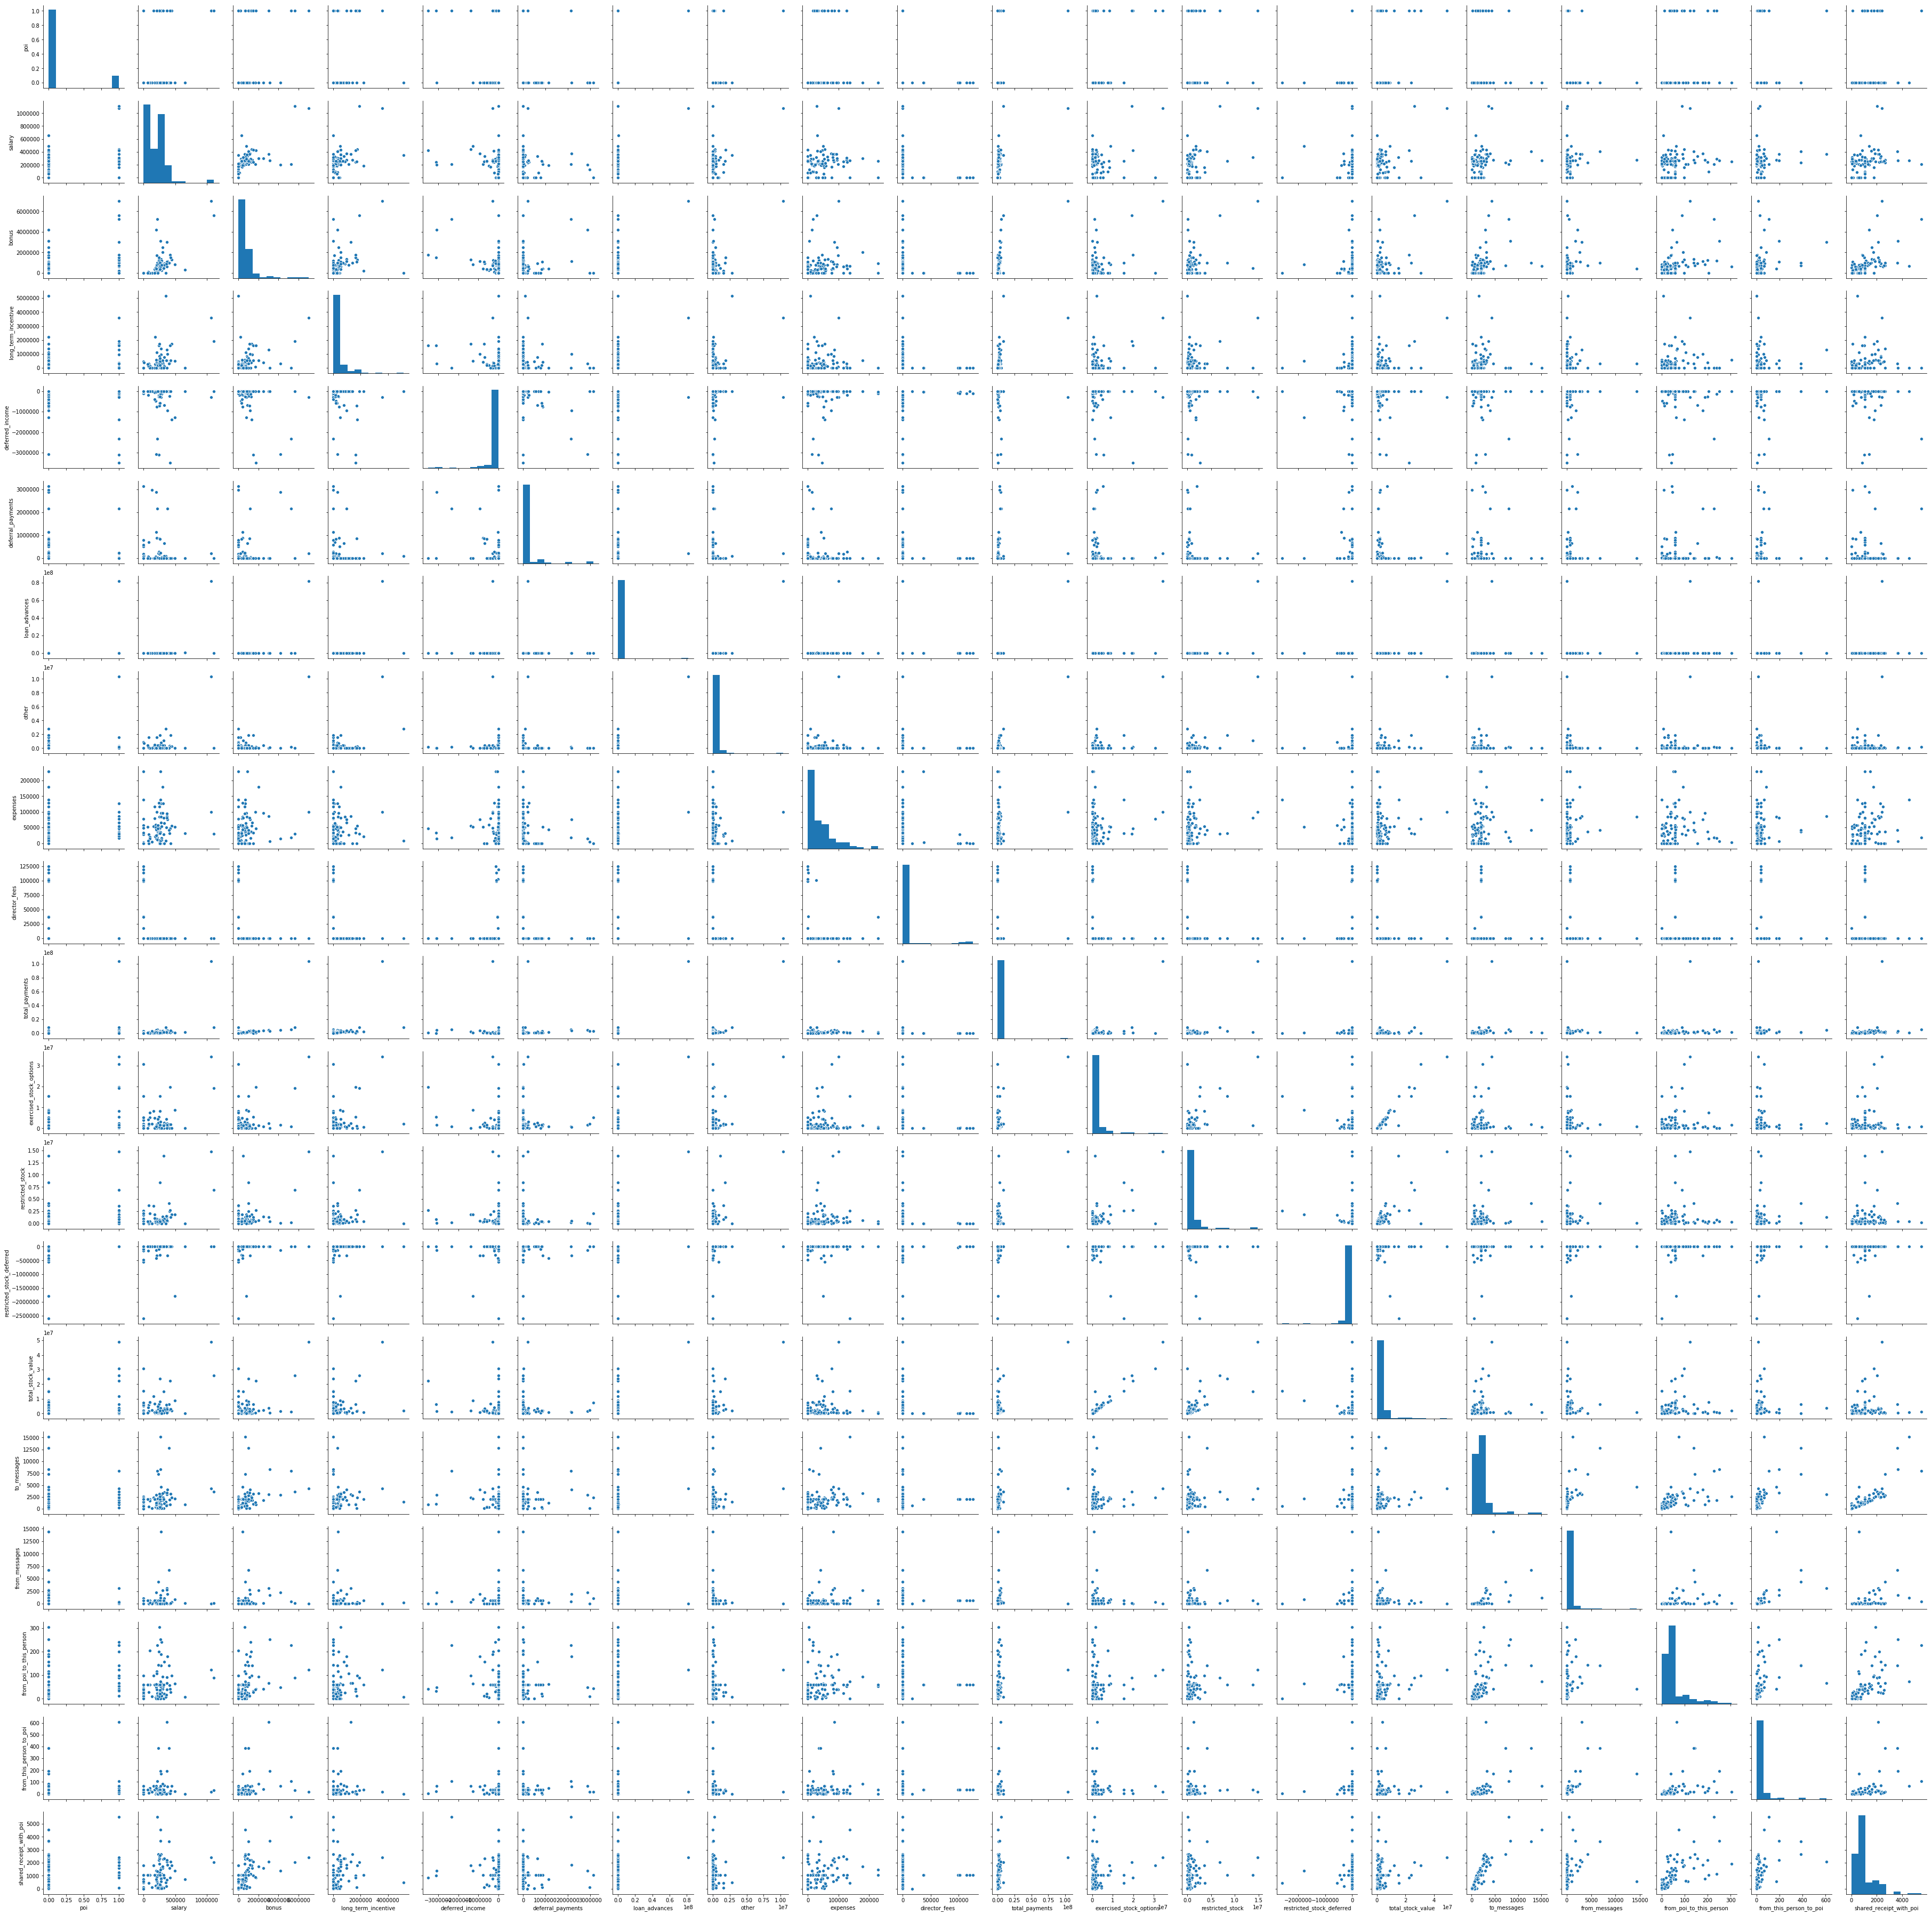

In [78]:
#check data distribution and correlation
sns.pairplot(df)

In [80]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc,accuracy_score,average_precision_score,\
recall_score, roc_auc_score, roc_curve, recall_score, classification_report, f1_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict

### Custom performance metrics Class for binary classification performance analysis

In [81]:
class perf_metrics(object):
    '''Custom class that creates an object using model, data features and label'''
    def __init__(self,model,features,label):
        self.model = model
        self.features = features
        self.label = label
    def getModel(self):
        return self.model
    def getFeatures(self):
        return self.features
    def getLabel(self):
        return self.label
    def __str__(self):
        return 'Model '+ str(self.model) + '\n\n' + 'features\n'+ str(pd.DataFrame(self.features))\
                 + '\n\nLabel \n' + str(pd.DataFrame(self.label)) 
    def plot_prec_recall_vs_tresh(self,precisions, recalls, thresholds):
        plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
        plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
        plt.xlabel('Threshold')
        plt.legend(loc='upper left')
        plt.ylim([0,1])
    def pred_prob(self,k=3,method=None):
        if method=='cross_val':
            y_pred = cross_val_predict(self.model,self.features,self.label.ravel(),cv=k)
            y_prob = cross_val_predict(self.model,self.features,self.label.ravel(),cv=k, method='predict_proba')  
            scores = cross_val_score(estimator=self.model,X=self.features,y=self.label.ravel(),cv=k)
            return y_pred, y_prob, scores
        else:
            y_pred = self.model.predict(self.features)
            y_prob = self.model.predict_proba(self.features)
            return y_pred, y_prob
        
    def show_confusion(self,pred):
        cm = confusion_matrix(self.label,pred)
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);
        
    def show_roc(self,prob):
        fpr, tpr, threshold = roc_curve(self.label, prob[:,1])
        roc_auc = auc(fpr, tpr)
        #Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--'); plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right"); plt.show()
        return roc_auc
    
    def show_prec_rec(self,roc_auc,prob,pred):
        recall = recall_score(self.label,pred)
        print('recall',recall)
        macro_Precision = precision_score(self.label,pred, average='macro')
        micro_Precision = precision_score(self.label,pred, average='micro')
        weighted_Precision = precision_score(self.label,pred, average='weighted')
        print('macro_Precision={} micro_Precision={} weighted_Precision={}'.format(macro_Precision,micro_Precision,weighted_Precision))
        f1 = f1_score(self.label, pred)
        average_precision = average_precision_score(self.label, prob[:,1])
        pre, rec, tre = precision_recall_curve(self.label.ravel(),prob[:,1])
        #Plot Precision-Recall Curve
        plt.step(rec, pre, color='b', alpha=0.2, where='post')
        plt.fill_between(rec, pre, step='post', alpha=0.2, color='b')
        plt.xlabel('Recall'); plt.ylabel('Precision'); plt.ylim([0.0, 1.05]); plt.xlim([0.0, 1.0]);
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
        print('f1_score=%.3f auc=%.3f average_precision=%.3f' % (f1, roc_auc, average_precision))
        # plot no skill
        plt.plot([0, 1], [0.5, 0.5], linestyle='--')
        # plot the roc curve for the model
        plt.plot(rec, pre, marker='.')
        fig1 = plt.figure()
        self.plot_prec_recall_vs_tresh(pre, rec, tre)
        plt.show()
        
    def show_metrics(self):
        y_pred, y_prob = self.pred_prob()
        print(classification_report(self.label,y_pred))
        print('accuracy',accuracy_score(self.label,y_pred))
        self.show_confusion(y_pred)
        roc_auc = self.show_roc(y_prob) 
        self.show_prec_rec(roc_auc, prob=y_prob, pred=y_pred)       
    
    def cross_val_metrics(self,k=5):
        '''Accpets k as folds'''
        y_pred, y_prob, scores = self.pred_prob(method='cross_val',k=k)
        print('cross_validation_scores',scores)
        print('\n')
        print(classification_report(self.label,y_pred))
        print('accuracy',accuracy_score(self.label,y_pred))
        self.show_confusion(y_pred)
        roc_auc = self.show_roc(y_prob) 
        self.show_prec_rec(roc_auc, prob=y_prob, pred=y_pred)

### Custom function to do stratified train test split and smote oversampling on train set to deal with imbalanced dataset

In [105]:
def train_test(data):
    from sklearn.preprocessing import StandardScaler 
    from sklearn.model_selection import StratifiedShuffleSplit
    from imblearn.over_sampling import SMOTE
    
    np.random.seed(14)
    X = data.iloc[:,data.columns!='poi']
    y = np.array(data.iloc[:,data.columns=='poi'])   
    X = StandardScaler().fit_transform(X)   
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
    sss.get_n_splits(X, y)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE(random_state=14, ratio=1)
    X_train_res, y_train_res = sm.fit_sample(X_train,y_train.ravel())
    return X_train_res, y_train_res, X_test, y_test.ravel()

In [106]:
X_train, y_train, X_test, y_test = train_test(df)
pd.Series.value_counts(y_train)

True     76
False    76
dtype: int64

cross_validation_scores [0.8125     0.96666667 0.73333333 0.73333333 0.8       ]


              precision    recall  f1-score   support

       False       0.94      0.66      0.78        76
        True       0.74      0.96      0.83        76

   micro avg       0.81      0.81      0.81       152
   macro avg       0.84      0.81      0.80       152
weighted avg       0.84      0.81      0.80       152

accuracy 0.8092105263157895


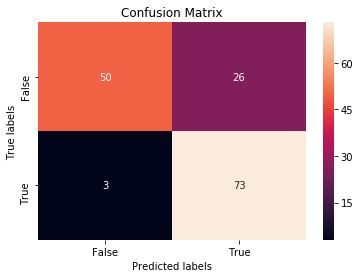

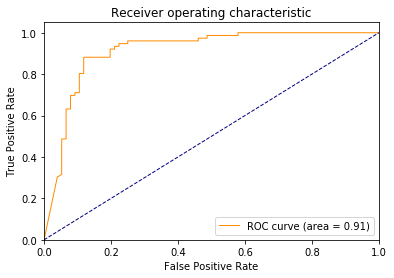

recall 0.9605263157894737
macro_Precision=0.8403849818944158 micro_Precision=0.8092105263157895 weighted_Precision=0.8403849818944158
f1_score=0.834 auc=0.913 average_precision=0.871


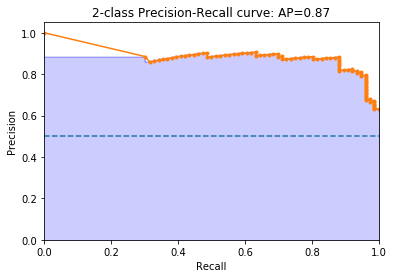

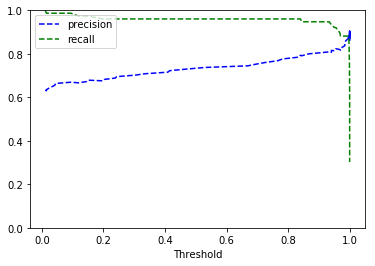

In [107]:
#Baseline Naive Bayes model cross validation score 
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)
nb_model_cv = perf_metrics(clf_nb,X_train,y_train)
nb_model_cv.cross_val_metrics()

              precision    recall  f1-score   support

       False       0.91      0.64      0.75        33
        True       0.20      0.60      0.30         5

   micro avg       0.63      0.63      0.63        38
   macro avg       0.56      0.62      0.53        38
weighted avg       0.82      0.63      0.69        38

accuracy 0.631578947368421


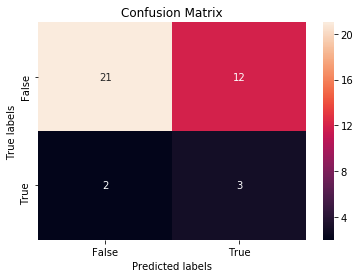

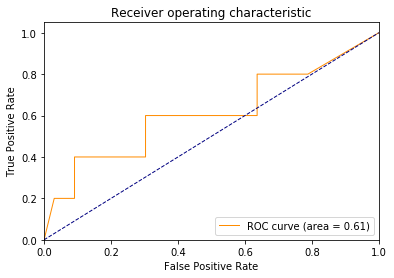

recall 0.6
macro_Precision=0.5565217391304348 micro_Precision=0.631578947368421 weighted_Precision=0.8192219679633868
f1_score=0.300 auc=0.612 average_precision=0.284


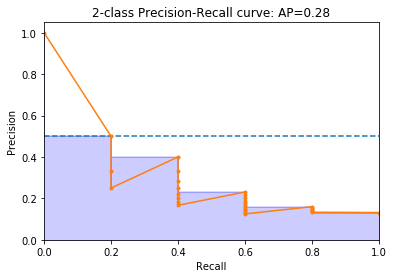

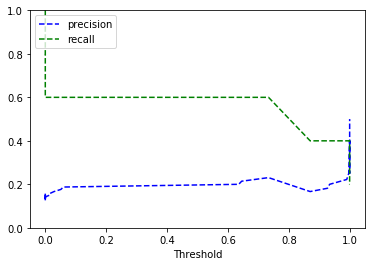

In [108]:
#Test Scores
nb_model = perf_metrics(clf_nb,X_test,y_test)
nb_model.show_metrics()

cross_validation_scores [0.96875    0.9        0.8        0.83333333 0.86666667]


              precision    recall  f1-score   support

       False       0.90      0.82      0.86        76
        True       0.83      0.91      0.87        76

   micro avg       0.86      0.86      0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152

accuracy 0.8618421052631579


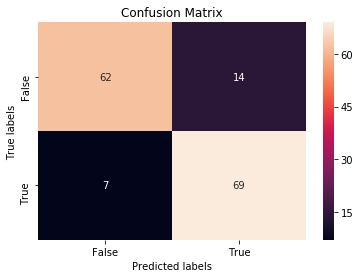

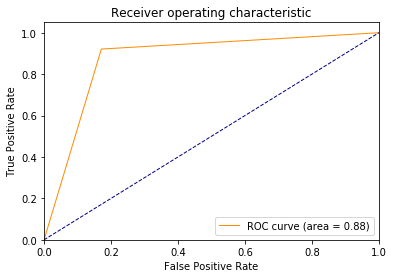

recall 0.9078947368421053
macro_Precision=0.8649380129212503 micro_Precision=0.8618421052631579 weighted_Precision=0.8649380129212503
f1_score=0.868 auc=0.875 average_precision=0.816


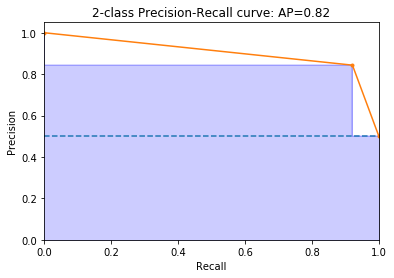

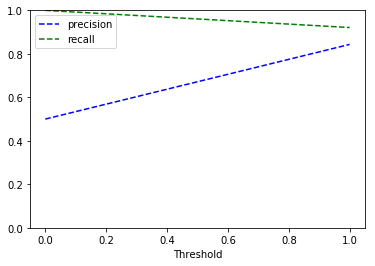

In [109]:
#Baseline Decision Tree Model cross validation score 
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
dt_model_cv = perf_metrics(clf_dt,X_train,y_train)
dt_model_cv.cross_val_metrics()

              precision    recall  f1-score   support

       False       0.94      0.91      0.92        33
        True       0.50      0.60      0.55         5

   micro avg       0.87      0.87      0.87        38
   macro avg       0.72      0.75      0.73        38
weighted avg       0.88      0.87      0.87        38

accuracy 0.868421052631579


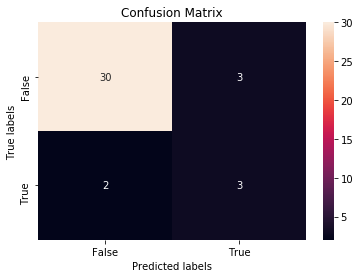

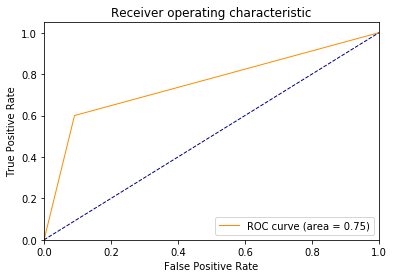

recall 0.6
macro_Precision=0.71875 micro_Precision=0.868421052631579 weighted_Precision=0.8799342105263158
f1_score=0.545 auc=0.755 average_precision=0.353


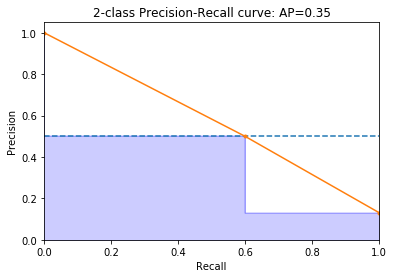

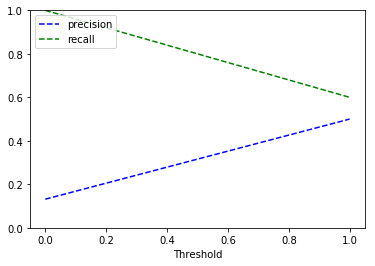

In [110]:
#Test Scores
dt_model = perf_metrics(clf_dt,X_test,y_test)
dt_model.show_metrics()

cross_validation_scores [0.84375    0.96666667 0.86666667 0.96666667 1.        ]


              precision    recall  f1-score   support

       False       0.99      0.87      0.92        76
        True       0.88      0.99      0.93        76

   micro avg       0.93      0.93      0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152

accuracy 0.9276315789473685


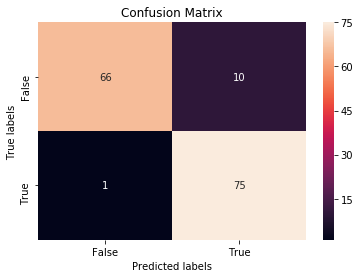

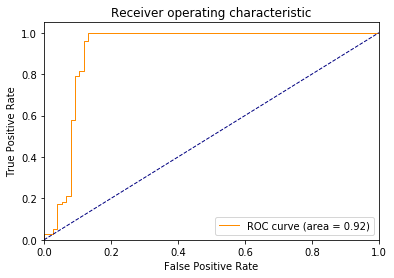

recall 0.9868421052631579
macro_Precision=0.9337137840210711 micro_Precision=0.9276315789473685 weighted_Precision=0.9337137840210711
f1_score=0.932 auc=0.919 average_precision=0.837


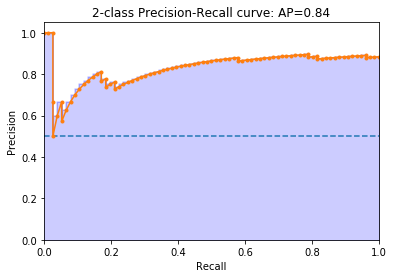

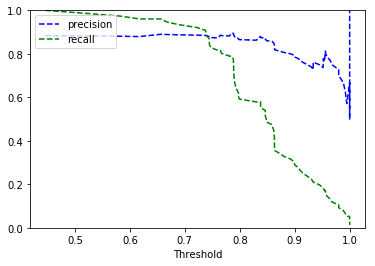

In [111]:
#Baseline SVM Model cross validation score 
from sklearn.svm import SVC

clf_svm = SVC(kernel='linear',probability=True,gamma='scale')
clf_svm.fit(np.array(X_train),y_train)
svm_model_cv = perf_metrics(clf_svm,X_train,y_train)
svm_model_cv.cross_val_metrics()

              precision    recall  f1-score   support

       False       0.91      0.88      0.89        33
        True       0.33      0.40      0.36         5

   micro avg       0.82      0.82      0.82        38
   macro avg       0.62      0.64      0.63        38
weighted avg       0.83      0.82      0.82        38

accuracy 0.8157894736842105


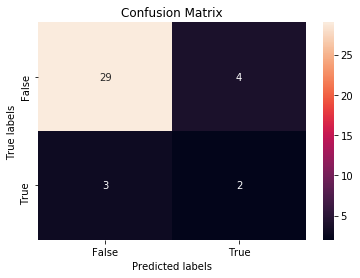

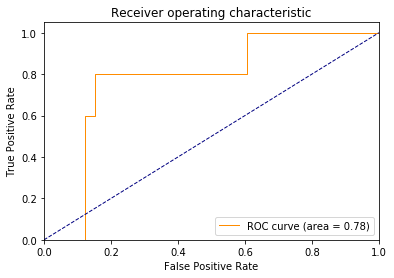

recall 0.4
macro_Precision=0.6197916666666666 micro_Precision=0.8157894736842105 weighted_Precision=0.8308662280701755
f1_score=0.364 auc=0.776 average_precision=0.321


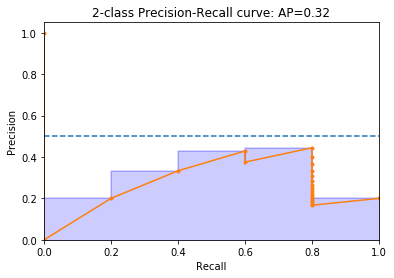

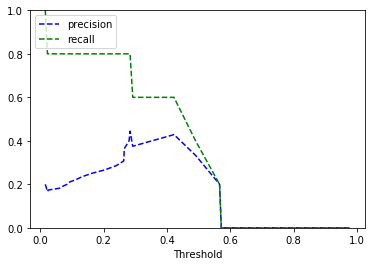

In [112]:
#Test Scoress
svm_model = perf_metrics(clf_svm,X_test,y_test)
svm_model.show_metrics()

cross_validation_scores [0.8125     1.         0.93333333 0.9        0.9       ]


              precision    recall  f1-score   support

       False       0.96      0.92      0.94        76
        True       0.92      0.96      0.94        76

   micro avg       0.94      0.94      0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152

accuracy 0.9407894736842105


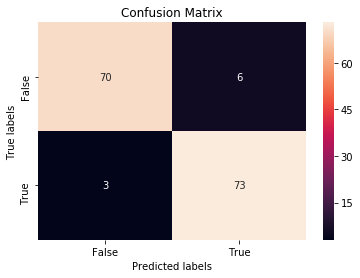

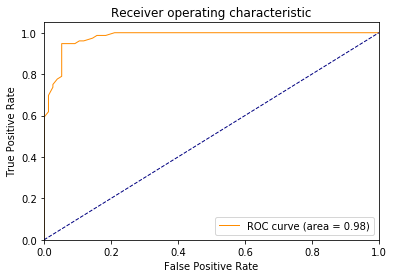

recall 0.9605263157894737
macro_Precision=0.9414773712502167 micro_Precision=0.9407894736842105 weighted_Precision=0.9414773712502167
f1_score=0.942 auc=0.980 average_precision=0.978


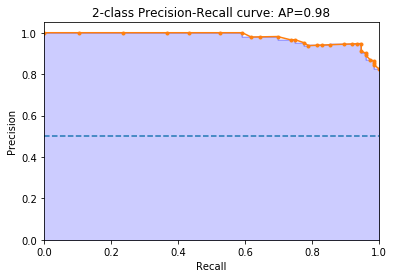

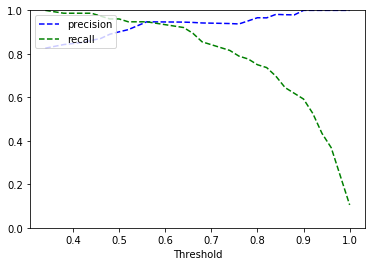

In [94]:
#Baseline Random Forrest Bagging Model cross validation score 
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf.fit(X_train,y_train)
rf_model_cv = perf_metrics(clf_rf,X_train,y_train)
rf_model_cv.cross_val_metrics()

              precision    recall  f1-score   support

       False       0.91      0.94      0.93        33
        True       0.50      0.40      0.44         5

   micro avg       0.87      0.87      0.87        38
   macro avg       0.71      0.67      0.68        38
weighted avg       0.86      0.87      0.86        38

accuracy 0.868421052631579


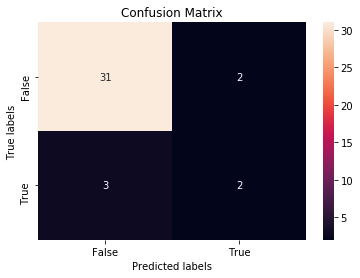

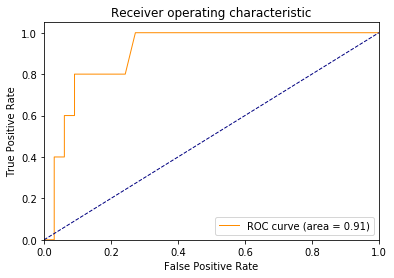

recall 0.4
macro_Precision=0.7058823529411764 micro_Precision=0.868421052631579 weighted_Precision=0.8575851393188854
f1_score=0.444 auc=0.906 average_precision=0.539


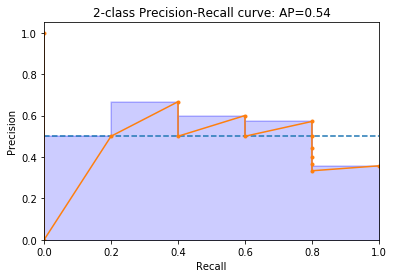

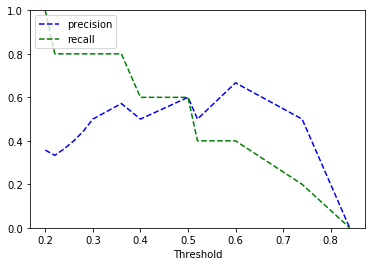

In [113]:
#Test Scores
rf_model = perf_metrics(clf_rf,X_test,y_test)
rf_model.show_metrics()

cross_validation_scores [0.8125     0.76666667 0.9        0.93333333 0.83333333]


              precision    recall  f1-score   support

       False       0.87      0.82      0.84        76
        True       0.83      0.88      0.85        76

   micro avg       0.85      0.85      0.85       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.85      0.85      0.85       152

accuracy 0.8486842105263158


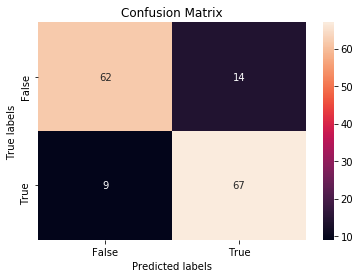

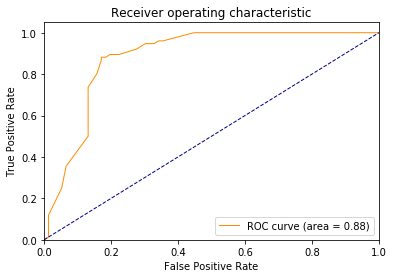

recall 0.881578947368421
macro_Precision=0.8501999652234393 micro_Precision=0.8486842105263158 weighted_Precision=0.8501999652234394
f1_score=0.854 auc=0.883 average_precision=0.823


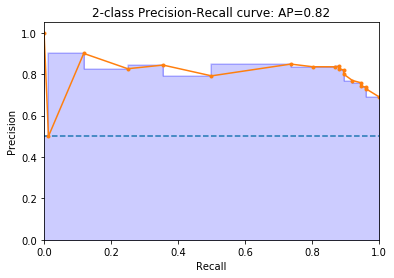

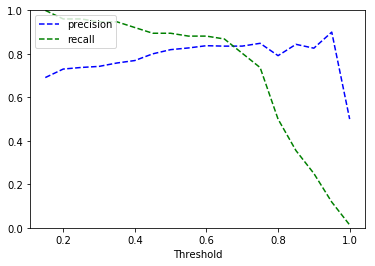

In [116]:
#Baseline KNN cross validation score 
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf_knn.fit(X_train,y_train)
knn_model_cv = perf_metrics(clf_knn,X_train,y_train)
knn_model_cv.cross_val_metrics()

              precision    recall  f1-score   support

       False       0.92      0.70      0.79        33
        True       0.23      0.60      0.33         5

   micro avg       0.68      0.68      0.68        38
   macro avg       0.58      0.65      0.56        38
weighted avg       0.83      0.68      0.73        38

accuracy 0.6842105263157895


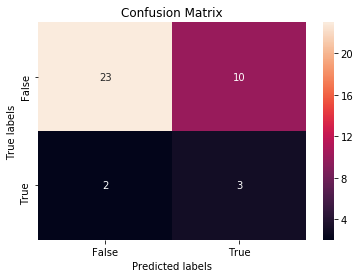

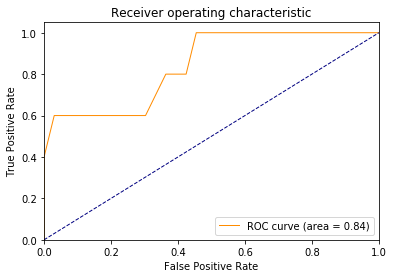

recall 0.6
macro_Precision=0.5753846153846154 micro_Precision=0.6842105263157895 weighted_Precision=0.8293117408906884
f1_score=0.333 auc=0.842 average_precision=0.650


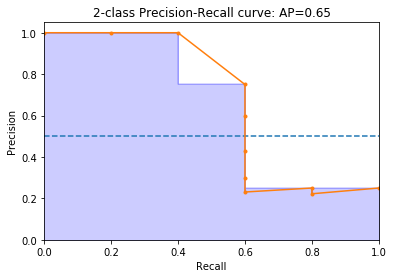

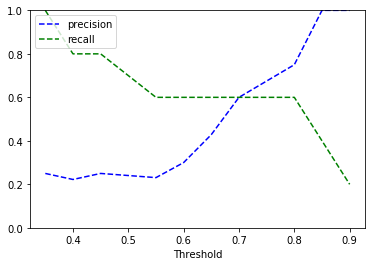

In [117]:
#Test Scores
knn_model = perf_metrics(clf_knn,X_test,y_test)
knn_model.show_metrics()

cross_validation_scores [0.8125     1.         0.93333333 0.9        0.9       ]


              precision    recall  f1-score   support

       False       0.97      0.84      0.90        76
        True       0.86      0.97      0.91        76

   micro avg       0.91      0.91      0.91       152
   macro avg       0.92      0.91      0.91       152
weighted avg       0.92      0.91      0.91       152

accuracy 0.9078947368421053


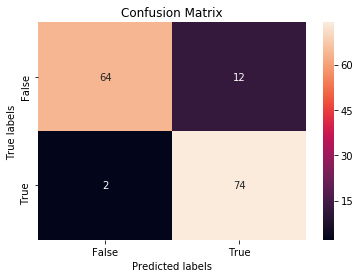

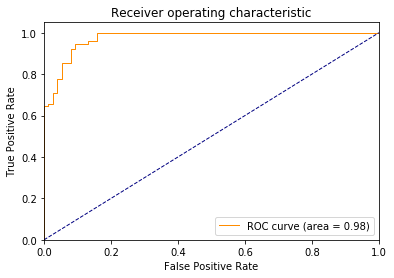

recall 0.9736842105263158
macro_Precision=0.9150810429880197 micro_Precision=0.9078947368421053 weighted_Precision=0.9150810429880198
f1_score=0.914 auc=0.976 average_precision=0.975


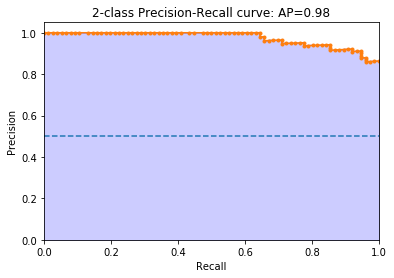

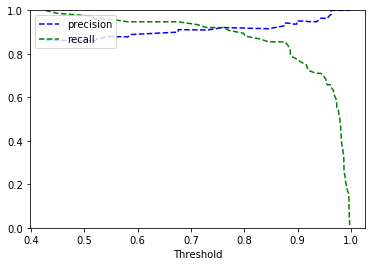

In [118]:
#Baseline XGboost Model cross validation score 
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train,y_train)
xgb_model_cv = perf_metrics(clf_xgb,X_train,y_train)
xgb_model_cv.cross_val_metrics()

              precision    recall  f1-score   support

       False       0.94      0.94      0.94        33
        True       0.60      0.60      0.60         5

   micro avg       0.89      0.89      0.89        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.89      0.89      0.89        38

accuracy 0.8947368421052632


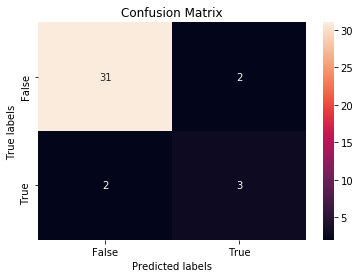

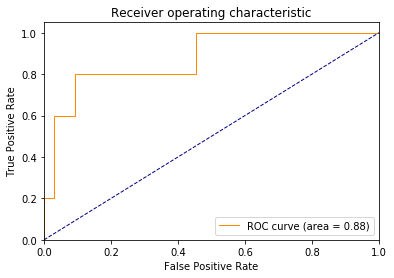

recall 0.6
macro_Precision=0.7696969696969698 micro_Precision=0.8947368421052632 weighted_Precision=0.8947368421052632
f1_score=0.600 auc=0.879 average_precision=0.648


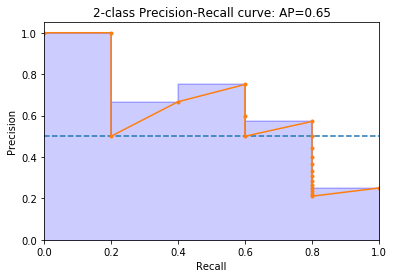

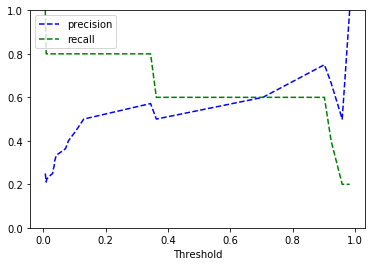

In [119]:
#Test Scores
xgb_model = perf_metrics(clf_xgb,X_test,y_test)
xgb_model.show_metrics()

### Create new features using domian knowledge

In [120]:
df_fe = df.copy() #Feature enginered data set
# Create the new financial features and add to the dataframe using financial data
df_fe['bonus_to_salary'] = df_fe['bonus'] / df_fe['salary']
df_fe['bonus_to_total'] = df_fe['bonus'] / df_fe['total_payments']
#Fill NaN with 0 for payment and stock values
df_fe['bonus_to_salary'] = df_fe[payment_data].fillna(0)
df_fe['bonus_to_total'] = df_fe[stock_data].fillna(0)
# Add the new email features to the dataframe using email data
df_fe['to_poi_ratio'] = df_fe['from_poi_to_this_person'] / df_fe['to_messages']
df_fe['from_poi_ratio'] = df_fe['from_this_person_to_poi'] / df_fe['from_messages']
df_fe['shared_poi_ratio'] = df_fe['shared_receipt_with_poi'] / df_fe['to_messages']

In [ ]:
#Drop Unnecessary Features

In [124]:
df.isna().sum().sum()

0

In [131]:
X_train_fe, y_train, X_test_fe, y_test = train_test(df_fe)
pd.Series.value_counts(y_train)

True     76
False    76
dtype: int64

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        76
        True       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

accuracy 1.0


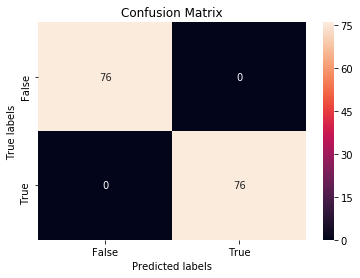

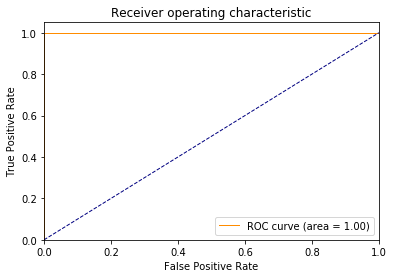

recall 1.0
macro_Precision=1.0 micro_Precision=1.0 weighted_Precision=1.0
f1_score=1.000 auc=1.000 average_precision=1.000


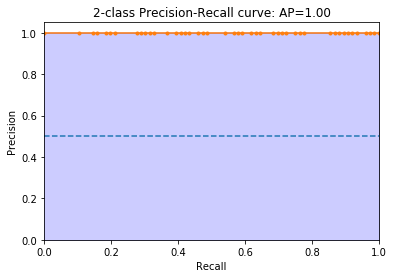

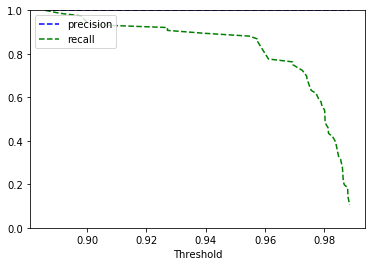

In [132]:
#Feature Enineered XGB Baseline Model Cross Validation Scores
clf_xgb = XGBClassifier(n_estimators=50)
clf_xgb.fit(X_train_fe, y_train)
xgb_model_cv = perf_metrics(clf_xgb,X_train_fe,y_train)
xgb_model_cv.show_metrics()

              precision    recall  f1-score   support

       False       0.97      0.94      0.95        33
        True       0.67      0.80      0.73         5

   micro avg       0.92      0.92      0.92        38
   macro avg       0.82      0.87      0.84        38
weighted avg       0.93      0.92      0.92        38

accuracy 0.9210526315789473


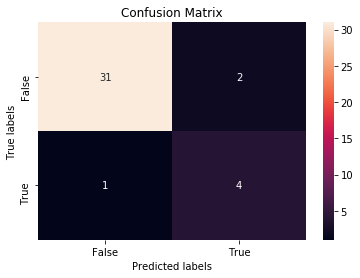

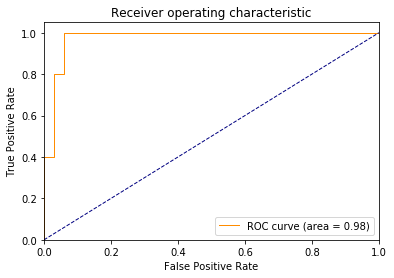

recall 0.8
macro_Precision=0.8177083333333333 micro_Precision=0.9210526315789473 weighted_Precision=0.9290021929824562
f1_score=0.727 auc=0.976 average_precision=0.853


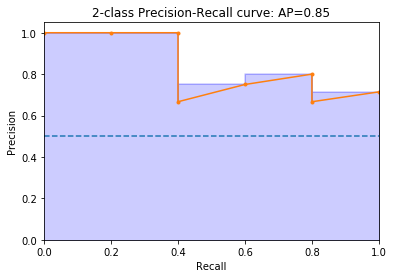

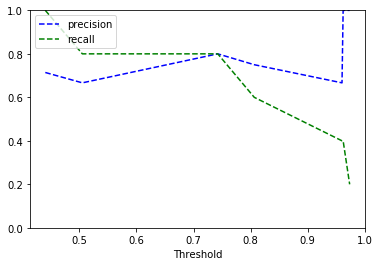

In [133]:
#Test Scores
xgb_model = perf_metrics(clf_xgb,X_test_fe,y_test)
xgb_model.show_metrics()

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        76
        True       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

accuracy 1.0


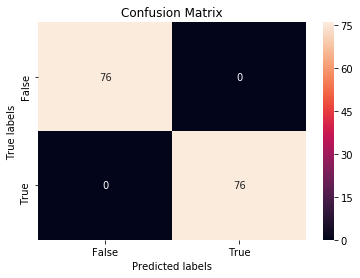

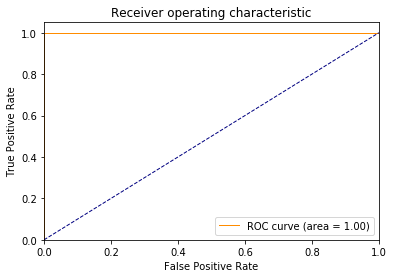

recall 1.0
macro_Precision=1.0 micro_Precision=1.0 weighted_Precision=1.0
f1_score=1.000 auc=1.000 average_precision=1.000


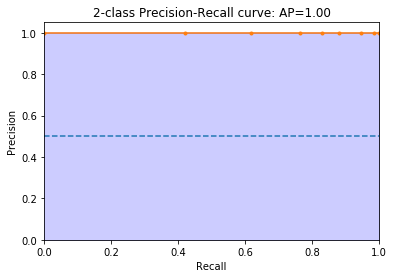

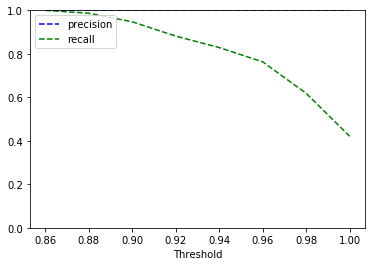

In [134]:
#Feature Enineered Random Forrest Baseline Model Cross Validation Scores
clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf.fit(X_train_fe,y_train) 
rf_model_cv = perf_metrics(clf_rf,X_train_fe,y_train)
rf_model_cv.show_metrics()

              precision    recall  f1-score   support

       False       0.97      0.97      0.97        33
        True       0.80      0.80      0.80         5

   micro avg       0.95      0.95      0.95        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.95      0.95      0.95        38

accuracy 0.9473684210526315


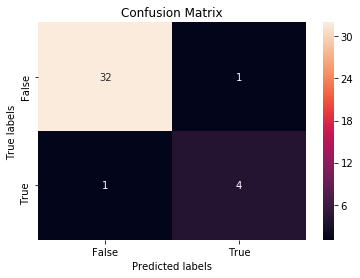

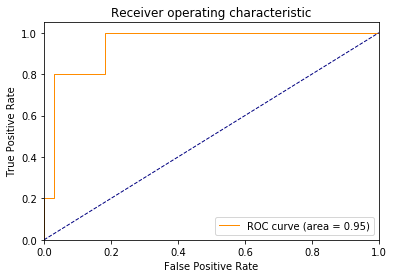

recall 0.8
macro_Precision=0.8848484848484849 micro_Precision=0.9473684210526315 weighted_Precision=0.9473684210526315
f1_score=0.800 auc=0.945 average_precision=0.751


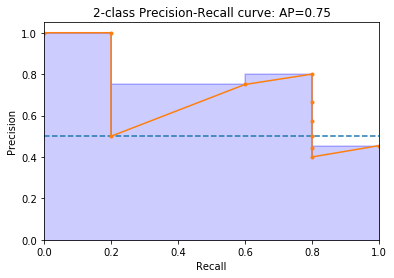

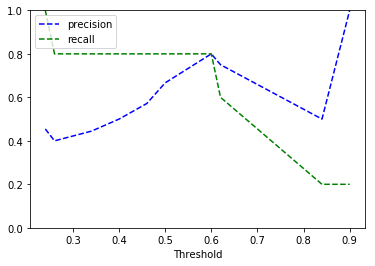

In [135]:
#Test Scores
rf_model = perf_metrics(clf_rf,X_test_fe,y_test)
rf_model.show_metrics()

In [100]:
# A parameter grid for XGBoost
import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold

parameters = {'objective':['binary:logistic'],
              'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
              'learning_rate': [0.01, 0.05, 0.02, 0.1, 1], #so called `eta` value
              'max_depth': [2, 3, 4, 5, 6],
              'min_child_weight': [1, 5, 10],
              'silent': [1],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'n_estimators': [25,50,100,150,200] #number of trees, change it to 1000 for better results
              }

xgb_model = XGBClassifier(nthread=-1)
clf_xgb_tuned = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)
# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
clf_xgb_tuned.fit(X_train_fe, y_train)

Fitting 5 folds for each of 20250 candidates, totalling 101250 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  32 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 1394 tasks      | elapsed:   12.2s
[Parallel(n_jobs=5)]: Done 3830 tasks      | elapsed:   30.0s
[Parallel(n_jobs=5)]: Done 7226 tasks      | elapsed:   54.3s
[Parallel(n_jobs=5)]: Done 11606 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 16946 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 23270 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 30554 tasks      | elapsed:  3.9min
[Parallel(n_jobs=5)]: Done 38822 tasks      | elapsed:  5.1min
[Parallel(n_jobs=5)]: Done 48050 tasks      | elapsed:  6.2min
[Parallel(n_jobs=5)]: Done 58262 tasks      | elapsed:  7.4min
[Parallel(n_jobs=5)]: Done 69434 tasks      | elapsed:  8.8min
[Parallel(n_jobs=5)]: Done 80714 tasks      | elapsed: 10.3min
[Parallel(n_jobs=5)]: Done 87272 tasks      | elapsed: 11.1min
[Parallel(n_jobs=5)]: Done 94322 tasks      | el

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'objective': ['binary:logistic'], 'gamma': [0.1, 0.5, 1, 1.5, 2, 5], 'learning_rate': [0.01, 0.05, 0.02, 0.1, 1], 'max_depth': [2, 3, 4, 5, 6], 'min_child_weight': [1, 5, 10], 'silent': [1], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'n_estimators': [25, 50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [101]:
clf_xgb_tuned.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 25,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 0.8}

In [102]:
clf_xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=25, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

              precision    recall  f1-score   support

       False       1.00      0.89      0.94        37
        True       0.56      1.00      0.71         5

   micro avg       0.90      0.90      0.90        42
   macro avg       0.78      0.95      0.83        42
weighted avg       0.95      0.90      0.92        42

accuracy 0.9047619047619048


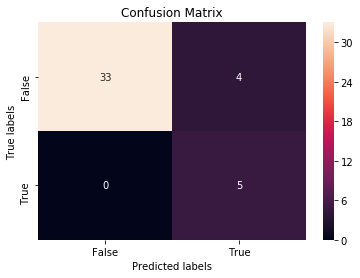

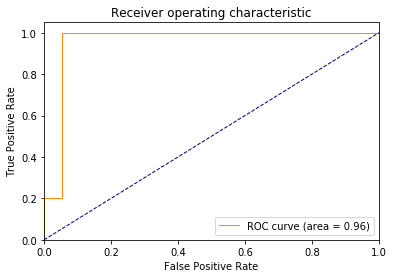

recall 1.0
macro_Precision=0.7777777777777778 micro_Precision=0.9047619047619048 weighted_Precision=0.9470899470899471
f1_score=0.714 auc=0.957 average_precision=0.696


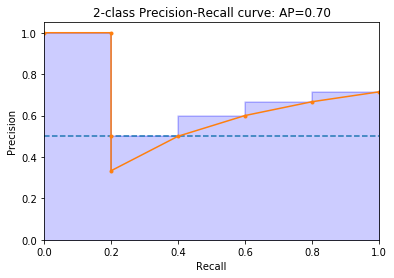

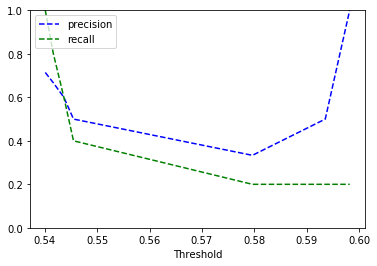

In [103]:
xgb_tuned_model = perf_metrics(clf_xgb_tuned,X_test_fe,y_test)
xgb_tuned_model.show_metrics()

              precision    recall  f1-score   support

       False       1.00      0.94      0.97        33
        True       0.71      1.00      0.83         5

   micro avg       0.95      0.95      0.95        38
   macro avg       0.86      0.97      0.90        38
weighted avg       0.96      0.95      0.95        38

accuracy 0.9473684210526315


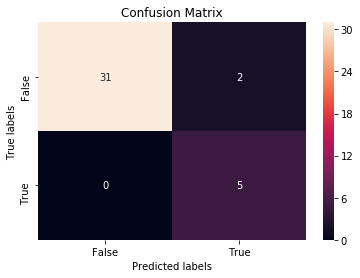

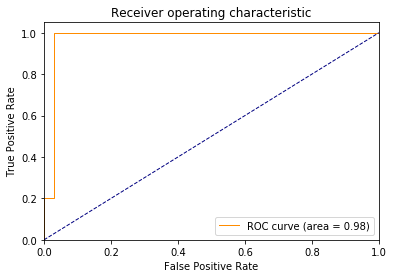

recall 1.0
macro_Precision=0.8571428571428572 micro_Precision=0.9473684210526315 weighted_Precision=0.9624060150375939
f1_score=0.833 auc=0.976 average_precision=0.810


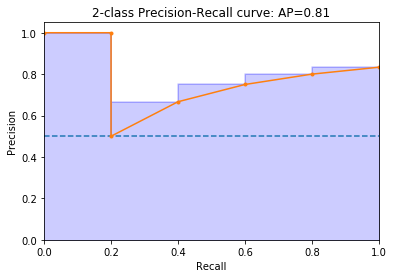

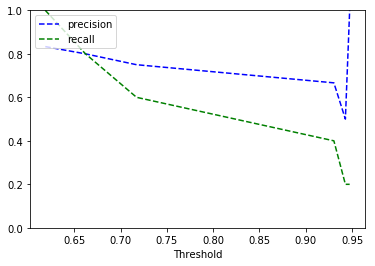

In [136]:
best_xgb_fe = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.5, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)
best_xgb_fe.fit(X_train_fe,y_train)
xgb_fe_model = perf_metrics(best_xgb_fe,X_test_fe,y_test)
xgb_fe_model.show_metrics()

#As we can see feature engineering improves model performance by a lot

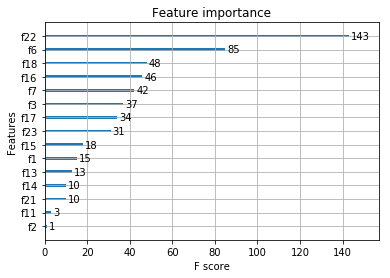

In [137]:
from xgboost import plot_importance
plot_importance(best_xgb_fe)

In [97]:
#A grid for Random Forrest Tuning
param_grid = {"max_depth": [1, 2, 3, None],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              'n_estimators': [50,100,150,200]
             }
clf = RandomForestClassifier()
clf_rf_tuned = GridSearchCV(clf, param_grid=param_grid, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   verbose=2, refit=True, scoring = 'roc_auc')
start = time.time()
clf_rf_tuned.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    4.1s
[Parallel(n_jobs=5)]: Done 294 tasks      | elapsed:   20.4s
[Parallel(n_jobs=5)]: Done 700 tasks      | elapsed:   51.4s
[Parallel(n_jobs=5)]: Done 960 out of 960 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'max_depth': [1, 2, 3, None], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [98]:
clf_rf_tuned.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              precision    recall  f1-score   support

       False       1.00      0.92      0.96        37
        True       0.62      1.00      0.77         5

   micro avg       0.93      0.93      0.93        42
   macro avg       0.81      0.96      0.86        42
weighted avg       0.96      0.93      0.94        42

accuracy 0.9285714285714286


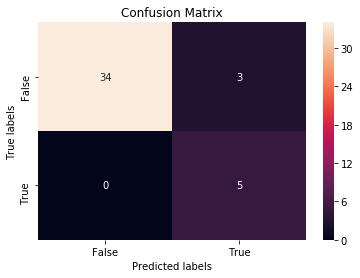

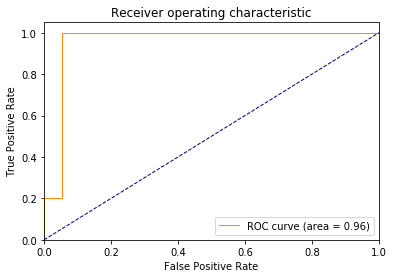

recall 1.0
macro_Precision=0.8125 micro_Precision=0.9285714285714286 weighted_Precision=0.9553571428571429
f1_score=0.769 auc=0.957 average_precision=0.696


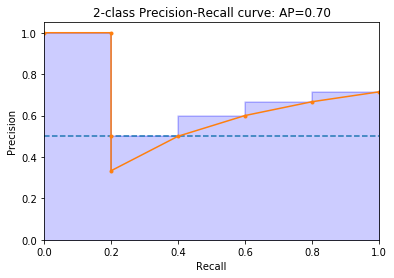

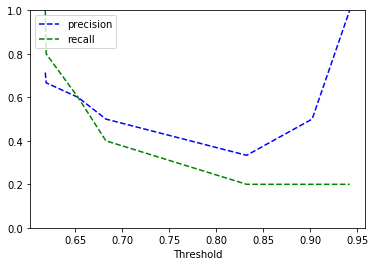

In [99]:
rf_tuned_model = perf_metrics(clf_rf_tuned,X_test,y_test)
rf_tuned_model.show_metrics()

### Doc2Vec Model

In [128]:
#Data cleaning
def email_cleaning(text):
    email = text.lower()    
    # clean and tokenize document string
    email_content = email.split()    
    word_list = []
    for i in email_content:
        x = 0
        if (('http' not in i) and ('@' not in i) and ('<.*?>' not in i) and i.isalnum() and (not i in stop_words)):
            word_list += [i]
    return word_list 

#Data Pre-processing
def preprocessing(text):    
    # remove numbers
    number_tokens = [re.sub(r'[\d]', ' ', i) for i in text]
    number_tokens = ' '.join(number_tokens).split()
     # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
    # remove empty
    length_tokens = [i for i in stemmed_tokens if len(i) > 1]
    return length_tokens

In [129]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
all_content = []
texts = []
j=0
k=0
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
p_stemmer = PorterStemmer()
for em in email_data.content:           
    #Data cleaning
    clean_content = email_cleaning(em)
    
    #Pre-processing
    processed_email = preprocessing(clean_content)
    
    # add tokens to list
    if processed_email:
        all_content.append(LabeledSentence1(processed_email,[j]))
        j+=1
        
    k+=1

print("Number of emails processed: ", k)
print("Number of non-empty emails vectors: ", j)

Number of emails processed:  126
Number of non-empty emails vectors:  126


In [138]:
all_content[125]

TaggedDocument(words=['forward', 'tim', 'kristian', 'land', 'pm', 'christoph', 'jake', 'frank', 'elliot', 'michael', 'david', 'laird', 'jim', 'jim', 'terri', 'jeff', 'ed', 'saji', 'michael', 'alan', 'tim', 'robert', 'matt', 'mike', 'todd', 'jeffrey', 'new', 'nov', 'th', 'forward', 'tim', 'kristian', 'land', 'pm', 'christoph', 'jake', 'frank', 'elliot', 'michael', 'david', 'laird', 'jim', 'jim', 'terri', 'jeff', 'ed', 'saji', 'michael', 'alan', 'tim', 'robert', 'matt', 'mike', 'todd', 'jeffrey', 'new', 'nov', 'th', 'forward', 'tim', 'kristian', 'land', 'pm', 'christoph', 'jake', 'frank', 'elliot', 'michael', 'david', 'laird', 'jim', 'jim', 'terri', 'jeff', 'ed', 'saji', 'michael', 'alan', 'tim', 'robert', 'matt', 'mike', 'todd', 'jeffrey', 'new', 'nov', 'th', 'check', 'let', 'everyon', 'know', 'forward', 'tim', 'pm', 'richard', 'ingersol', 'pm', 'cdt', 'tim', 'tim', 'path', 'otc', 'increas', 'studi', 'report', 'confer', 'call', 'info', 'haeeeri', 'reason', 'believ', 'uprat', 'path', 'ge

In [139]:
d2v_model = Doc2Vec(all_content, size = 2000, window = 10, min_count = 500, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

In [142]:
d2v_model.train(all_content, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

In [148]:
#print similar documents to doc 125
print (d2v_model.docvecs.most_similar(125))

[(42, 0.9997836351394653), (75, 0.9997576475143433), (49, 0.9997526407241821), (89, 0.9997382164001465), (12, 0.9997348785400391), (9, 0.9997090101242065), (16, 0.9997035264968872), (82, 0.9996697902679443), (8, 0.9996447563171387), (105, 0.9996365308761597)]


In [248]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=100)  
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()

In [249]:
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

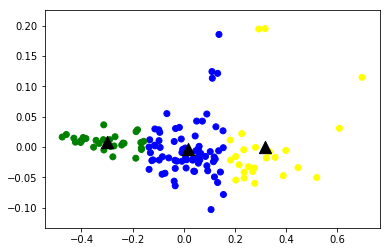

In [250]:
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080","#8A0080","#80BC80"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [230]:
df = pd.merge(df,email_data,how='inner',left_on=df.index, right_on=email_data['X-From'])

In [376]:
df.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_poi_ratio,from_poi_ratio,shared_poi_ratio,bonus_to_salary,bonus_to_total,cluster_label
key_0,,,,,,,,,,,,,,,,,,,,,
BELDEN TIMOTHY N,True,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,...,484.0,228.0,108.0,5521.0,0.028532,0.223140,0.690902,213999.0,953136.0,1
BOWEN JR RAYMOND M,True,278601.0,1350000.0,974293.0,-833.0,0.0,0.0,1621.0,65907.0,0.0,...,27.0,140.0,15.0,1593.0,0.075350,0.555556,0.857374,278601.0,0.0,2
CALGER CHRISTOPHER F,True,240189.0,1250000.0,375304.0,-262500.0,0.0,0.0,486.0,35818.0,0.0,...,144.0,199.0,25.0,2188.0,0.076597,0.173611,0.842186,240189.0,0.0,1
CAUSEY RICHARD A,True,415189.0,1000000.0,350000.0,-235000.0,0.0,0.0,307895.0,30674.0,0.0,...,49.0,58.0,12.0,1585.0,0.030655,0.244898,0.837738,415189.0,0.0,1
COLWELL WESLEY,True,288542.0,1200000.0,0.0,-144062.0,27610.0,0.0,101740.0,16514.0,0.0,...,40.0,240.0,11.0,1132.0,0.136519,0.275000,0.643914,288542.0,0.0,2


In [233]:
df.drop(['content','X-From'],inplace=True,axis=1)

In [234]:
df.set_index('key_0', inplace=True)

In [265]:
df['cluster_label'] = labels

In [396]:
np.random.seed(123)

X = df.iloc[:,df.columns!='poi']
y = np.array(df.iloc[:,df.columns=='poi'])

X = StandardScaler().fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y): 
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [397]:
X_train.shape

(88, 25)

In [390]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.5, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)
best_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.5, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)

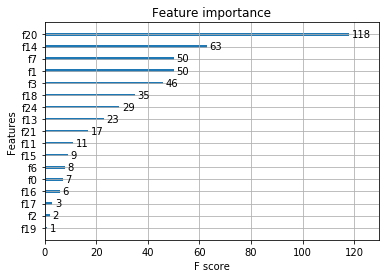

In [391]:
plot_importance(best_xgb)

              precision    recall  f1-score   support

       False       0.94      0.97      0.96        33
        True       0.75      0.60      0.67         5

   micro avg       0.92      0.92      0.92        38
   macro avg       0.85      0.78      0.81        38
weighted avg       0.92      0.92      0.92        38

accuracy 0.9210526315789473


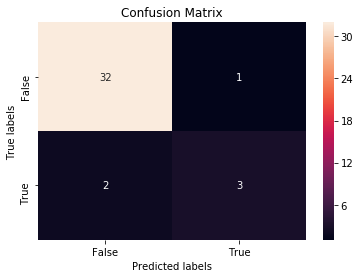

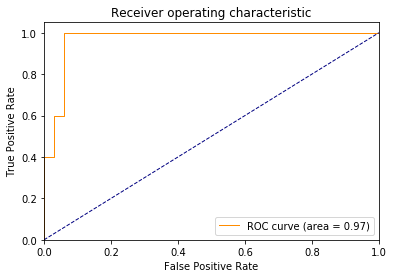

recall 0.6
macro_Precision=0.8455882352941176 micro_Precision=0.9210526315789473 weighted_Precision=0.9160216718266255
f1_score=0.667 auc=0.970 average_precision=0.826


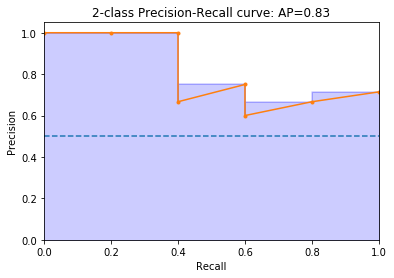

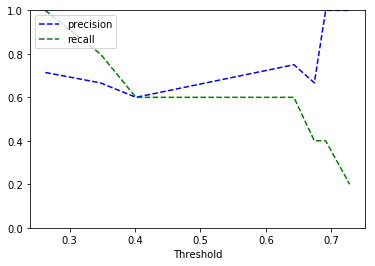

In [392]:
xgb_best_model = perf_metrics(best_xgb,X_test,y_test)
xgb_best_model.show_metrics()

In [401]:
# A parameter grid for XGBoost
'''params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }'''
parameters = {'objective':['binary:logistic'],
              'gamma': [0.1, 0.5, 1],
              'learning_rate': [0.05,0.02,0.1], #so called `eta` value
              'max_depth': [2, 3, 4],
              'min_child_weight': [1, 5],
              'silent': [1],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.8, 1.0],
              'n_estimators': [25,50,100] #number of trees, change it to 1000 for better results
              }

xgb_model = XGBClassifier(nthread=-1)
clf_xgb_tuned = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='recall',
                   verbose=2, refit=True)
# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
clf_xgb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 346 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 2282 tasks      | elapsed:   11.4s
[Parallel(n_jobs=5)]: Done 4860 out of 4860 | elapsed:   26.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'objective': ['binary:logistic'], 'gamma': [0.1, 0.5, 1], 'learning_rate': [0.05, 0.02, 0.1], 'max_depth': [2, 3, 4], 'min_child_weight': [1, 5], 'silent': [1], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'n_estimators': [25, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [402]:
xgb_cluster_model = perf_metrics(clf_xgb_tuned,X_test,y_test)

              precision    recall  f1-score   support

       False       0.94      0.97      0.96        33
        True       0.75      0.60      0.67         5

   micro avg       0.92      0.92      0.92        38
   macro avg       0.85      0.78      0.81        38
weighted avg       0.92      0.92      0.92        38

accuracy 0.9210526315789473


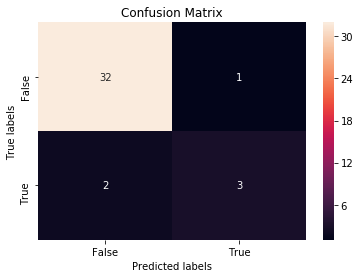

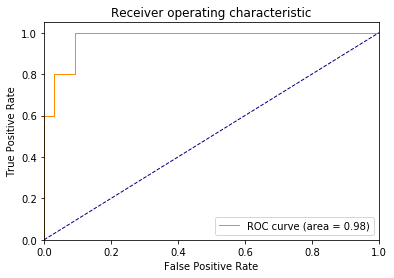

recall 0.6
macro_Precision=0.8455882352941176 micro_Precision=0.9210526315789473 weighted_Precision=0.9160216718266255
f1_score=0.667 auc=0.976 average_precision=0.885


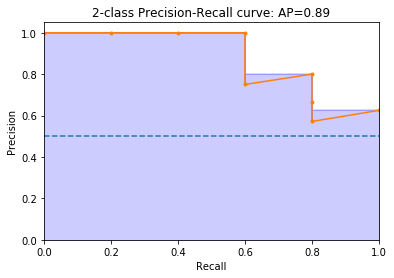

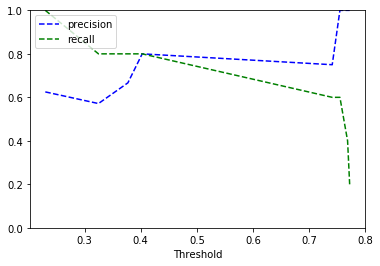

In [403]:
xgb_cluster_model.show_metrics()

In [309]:
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
from nltk.corpus import wordnet as wn
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

from pylab import *

import random
bagofwords = ('houston', 'phone', 'deal', 'meeting', 'north', 'mark', 'america', 'gas', 'best', 'john', 'agreement', 'smith', 'texas', 'talk', 'group', 'street', 'review', 'following', 'people', 'energy', 'message', 'might', 'trading', 'set', 'service', 'copy', 'contract', 'draft', 'night', 'schedule', 'weekend', 'scott', 'credit', 'place', 'letter', 'end', 'market', 'note', 'point', 'request', 'david', 'thursday', 'ben', 'issue', 'team', 'net', 'love', 'department', 'form', 'trade', 'conference', 'system', 'process', 'part', 'person', 'master', 'afternoon', 'development', 'risk', 'file', 'lunch', 'case', 'bill', 'carol', 'term', 'tuesday', 'cost', 'management', 'desk', 'mann', 'wednesday', 'sally', 'project', 'detail', 'haven', 'book', 'couple', 'lot', 'rate', 'mary', 'interest', 'report', 'given', 'jones', 'taylor', 'update', 'michael', 'california', 'party', 'dinner', 'response', 'tonight', 'position', 'bob', 'west', 'minute', 'tom', 'idea', 'final', 'support', 'language', 'paul', 'print', 'line', 'run', 'trip', 'version', 'document', 'sign', 'nice', 'course', 'london', 'return', 'least', 'robert', 'april', 'read', 'fun', 'sending', 'game', 'thinking', 'march', 'guess', 'saturday', 'town', 'communication', 'three', 'state', 'real', 'ready', 'presentation', 'room', 'james', 'spoke', 'approval', 'visit', 'making', 'old', 'cash', 'notice', 'purchase', 'value', 'transaction', 'sunday', 'capacity', 'stuff', 'july', 'general', 'word', 'data', 'sale', 'guy', 'prior', 'sell', 'status', 'june', 'capital', 'firm', 'bass', 'opportunity', 'high', 'amount', 'robin', 'type', 'product', 'answer', 'enough', 'mind', 'program', 'voice', 'side', 'january', 'location', 'section', 'operation', 'calendar', 'school', 'latest', 'option', 'elizabeth', 'bad', 'matter', 'customer', 'original', 'research', 'fact', 'assistant', 'site', 'east', 'discussion', 'volume', 'past', 'bit', 'specific', 'wait', 'germany', 'distribution', 'marketing', 'pipeline', 'commercial', 'kind', 'event', 'delivery', 'law', 'october', 'weather', 'outside', 'december', 'board', 'nothing', 'demand', 'news', 'august', 'folk', 'addition', 'reply', 'page', 'pick', 'memo', 'karen', 'thompson', 'play', 'floor', 'summer', 'handle', 'public', 'evening', 'cover', 'white', 'touch', 'world', 'period', 'decision', 'williams', 'level', 'george', 'staff', 'frank', 'sheet', 'gary', 'november', 'payment', 'confirmation', 'index', 'conversation', 'hello', 'wholesale', 'sense', 'pas', 'president', 'hearing', 'life', 'director', 'small', 'experience', 'top', 'drew', 'potential', 'clear', 'trader', 'wrong', 'view', 'arnold', 'entity', 'beck', 'finance', 'whole', 'lawyer', 'peter', 'city', 'lee', 'blackberry', 'wireless', 'hand', 'million', 'asset', 'hold', 'charge', 'davis', 'computer', 'situation', 'account', 'september', 'comment', 'model', 'key', 'paper', 'storage', 'luck', 'respect', 'supply', 'natural', 'kean', 'bank', 'senior', 'control', 'interview', 'head', 'dad', 'plant', 'jason', 'understanding', 'special', 'york', 'error', 'stop', 'reference', 'running', 'man', 'fuel', 'large', 'transport', 'assignment', 'class', 'canada', 'saw', 'pricing', 'individual', 'flow', 'invite', 'friend', 'february', 'south', 'policy', 'figure', 'sue', 'university', 'front', 'bid', 'austin', 'approach', 'building', 'farmer', 'summary', 'half', 'drop', 'peak', 'action', 'tax', 'spreadsheet', 'delay', 'confidentiality', 'four', 'central', 'effort', 'attention', 'analysis', 'third', 'proposal', 'opinion', 'industry', 'electric', 'committee', 'share', 'web', 'commission', 'center', 'ticket', 'release', 'fee', 'turn', 'performance', 'role', 'unit', 'input', 'brown', 'lead', 'thomas', 'facility', 'begin', 'exchange', 'attachment', 'car', 'harris', 'post', 'executive', 'duke', 'analyst', 'electricity', 'ted', 'structure', 'transmission', 'track', 'portland', 'production', 'light', 'hit', 'hotel', 'behalf', 'coordinate', 'execution', 'buying', 'internet', 'corporation', 'accounting', 'catch', 'beginning', 'focus', 'worth', 'fall', 'reach', 'signature', 'break', 'fund', 'link', 'balance', 'transfer', 'utility', 'session', 'welcome', 'standard', 'article', 'giving', 'seller', 'scheduling', 'martin', 'organization', 'example', 'condition', 'commodity', 'result', 'increase', 'bruce', 'employee', 'field', 'saying', 'step', 'amendment', 'miss', 'present', 'invitation', 'andrew', 'major', 'sound', 'spot', 'allen', 'international', 'application', 'selling', 'progress', 'young', 'filing', 'handling', 'holiday', 'format', 'story', 'database', 'hunter', 'feedback', 'impact', 'feeling', 'generation', 'initial', 'travel', 'strategy', 'load', 'monthly', 'cut', 'park', 'ability', 'brief', 'reminder', 'technology', 'personal', 'particular', 'low', 'grant', 'separate', 'concern', 'drive', 'termination', 'oil', 'miller', 'activity', 'telephone', 'checkout', 'baby', 'speaking', 'card', 'meter', 'effect', 'red', 'training', 'johnson', 'cool', 'vice', 'paragraph', 'transportation', 'receipt', 'pat', 'writing', 'flight', 'rod', 'mine', 'country', 'noon', 'water', 'mat', 'disclosure', 'dale', 'fit', 'advance', 'birthday', 'nancy', 'europe', 'agenda', 'stephen', 'forwarding', 'nelson', 'chicago', 'settlement', 'weekly', 'golf', 'jay', 'pool', 'curve', 'press', 'hall', 'portfolio', 'description', 'worry', 'joseph', 'statement', 'box', 'suite', 'extra', 'turbine', 'kitchen', 'edison', 'closing', 'watch', 'password', 'adam', 'base', 'stand', 'mention', 'member', 'charles', 'client', 'bryan', 'remove', 'investment', 'benefit', 'retail', 'air', 'rice', 'melissa', 'associate', 'setting', 'tracy', 'main', 'national', 'double', 'purpose', 'anne', 'technical', 'choice', 'season', 'black', 'timing', 'relationship', 'heather', 'responsibility', 'road', 'brad', 'table', 'king', 'five', 'bet', 'kelly', 'officer', 'authority', 'quality', 'sort', 'title', 'moore', 'cross', 'save', 'recipient', 'budget', 'bottom', 'court', 'equipment', 'wife', 'sender', 'agent', 'reading', 'morgan', 'consideration', 'gray', 'construction', 'spread', 'recall', 'federal', 'click', 'default', 'chat', 'convenience', 'canadian', 'local', 'average', 'keeping', 'agency', 'act', 'opening', 'connection', 'pacific', 'space', 'playing', 'assist', 'american', 'government', 'code', 'rebecca', 'overall', 'matthew', 'crazy', 'record', 'stanley', 'regard', 'daniel', 'yahoo', 'mara', 'bankruptcy', 'six', 'goal', 'worksheet', 'content', 'region', 'documentation', 'beth', 'clark', 'item', 'sweet', 'expense', 'blue', 'girl', 'cause', 'topic', 'size', 'match', 'equity', 'private', 'spring', 'solution', 'single', 'loss', 'success', 'florida', 'advice', 'maria', 'jackson', 'possibility', 'sun', 'serve', 'exposure', 'coal', 'boy', 'wedding', 'russell', 'limit', 'primary', 'annual', 'provision', 'quarter', 'food', 'fix', 'governor', 'washington', 'station', 'terry', 'speed', 'insurance', 'cook', 'shelley', 'patrick', 'material', 'rogers', 'bailey', 'helping', 'round', 'denver', 'litigation', 'mexico', 'face', 'sick', 'affair', 'reserve', 'background', 'consent', 'berkeley', 'positive', 'force', 'trust', 'calgary', 'closer', 'palmer', 'ward', 'copying', 'winter', 'sarah', 'push', 'diana', 'somewhere', 'todd', 'felt', 'cap', 'wilson', 'dog', 'bunch', 'loop', 'kent', 'administration', 'buyer', 'pressure', 'growth', 'football', 'campbell', 'fly', 'brother', 'network', 'moment', 'familiar', 'financing', 'dallas', 'participation', 'vote', 'candidate', 'stack', 'dial', 'anderson', 'zero', 'confusion', 'commitment', 'jean', 'spending', 'direction', 'favor', 'mon', 'crisis', 'software', 'beer', 'logistics', 'window', 'conflict', 'hate', 'entry', 'land', 'eye', 'donna', 'attempt', 'suggestion', 'video', 'perspective', 'derrick', 'stuart', 'recommendation', 'mistake', 'hang', 'annex', 'drink', 'forum', 'collateral', 'border', 'dick', 'edward', 'jordan', 'cold', 'liability', 'heading', 'active', 'split', 'resolution', 'club', 'minimum', 'preliminary', 'promotion', 'gathering', 'pipe', 'economics', 'hedge', 'billion', 'sleep', 'study', 'lotus', 'wonder', 'chair', 'advantage', 'certificate', 'ride', 'shari', 'path', 'log', 'exhibit', 'former', 'bed', 'extent', 'college', 'specialist', 'professor', 'ray', 'official', 'basic', 'zone', 'raise', 'claim', 'suspect', 'kaufman', 'jack', 'hire', 'speaker', 'target', 'simple', 'obligation', 'leg', 'finding', 'mother', 'win', 'permit', 'preference', 'county', 'shit', 'hell', 'secretary', 'louis', 'valuation', 'practice', 'guarantee', 'ron', 'damage', 'affiliate', 'son', 'survey', 'reservation', 'dissemination', 'definition', 'offering', 'hub', 'discount', 'concept', 'negative', 'representative', 'bradford', 'debt', 'buddy', 'till', 'sentence', 'loan', 'christopher', 'christian', 'exercise', 'pleasure', 'sister', 'collins', 'relation', 'tab', 'environment', 'delta', 'multiple', 'fundamental', 'columbia', 'deadline', 'nature', 'burn', 'taffy', 'sole', 'airport', 'wine', 'manner', 'professional', 'lack', 'testing', 'rose', 'property', 'arbitration', 'arrangement', 'panel', 'scope', 'block', 'chad', 'netting', 'god', 'bear', 'bar', 'student', 'sample', 'van', 'resource', 'japan', 'swing', 'northern', 'addressee', 'stage', 'proceeding', 'kick', 'requirement', 'heat', 'european', 'hull', 'attendance', 'absence', 'rep', 'imbalance', 'economy', 'despite', 'breakfast', 'carter', 'sacramento', 'lorraine', 'boston', 'tour', 'married', 'hill', 'estate', 'commerce', 'asp', 'cooper', 'series', 'replacement', 'announcement', 'community', 'sullivan', 'margin', 'joining', 'design', 'seminar', 'beach', 'correction', 'core', 'ten', 'woman', 'ground', 'victor', 'dutch', 'diligence', 'employment', 'tweed', 'partner', 'merchant', 'posting', 'assumption', 'worse', 'learning', 'joint', 'bos', 'apartment', 'teresa', 'shopping', 'stevens', 'participant', 'union', 'rule', 'engineering', 'contribution', 'allocation', 'virginia', 'leadership', 'exception', 'shipper', 'outline', 'division', 'wade', 'movie', 'expansion', 'failure', 'walker', 'pulp', 'partnership', 'text', 'wayne', 'diamond', 'intent', 'boat', 'career', 'map', 'howard', 'circumstance', 'judge', 'hook', 'association', 'australia', 'fleming', 'surprise', 'nick', 'maximum', 'mill', 'foster', 'greenberg', 'anthony', 'star', 'bond', 'shoot', 'colorado', 'paige', 'lindy', 'dispute', 'desire', 'gulf', 'dawn', 'timothy', 'mess', 'maintenance', 'mobile', 'piper', 'hanging', 'external', 'competition', 'coral', 'hector', 'valley', 'brazil', 'arizona', 'challenge', 'graduate', 'aquila', 'argument', 'rotation', 'producer', 'murray', 'guest', 'ford', 'bush', 'remains', 'emergency', 'implement', 'volatility', 'visiting', 'legislature', 'sharp', 'husband', 'campus', 'cliff', 'favorite', 'shirt', 'preparation', 'motley', 'anna', 'cooperation', 'art', 'threshold', 'flexibility', 'kill', 'daughter', 'assessment', 'throw', 'leader', 'excess', 'jonathan', 'cob', 'wharton', 'produce', 'fitzgerald', 'implementation', 'douglas', 'english', 'rush', 'impression', 'eta', 'drafting', 'auction', 'player', 'lucy', 'host', 'chase', 'southwest', 'treatment', 'omaha', 'heavy', 'herman', 'gen', 'legislation', 'gabriel', 'lease', 'koch', 'robinson', 'consumer', 'reagan', 'parent', 'compressor', 'veronica', 'involvement', 'coffee', 'bradley', 'robertson', 'lyon', 'audit', 'reaction', 'hughes', 'jenny', 'jurisdiction', 'completion', 'shape', 'harrison', 'bowl', 'clause', 'seeking', 'meredith', 'evaluation', 'infrastructure', 'glen', 'acquisition', 'christie', 'sherry', 'investor', 'conclusion', 'escrow', 'fletcher', 'brokerage', 'stanford', 'sierra', 'retention', 'publication', 'floating', 'gang', 'cant', 'modeling', 'refund', 'currency', 'church', 'variance', 'gallup', 'contractor', 'ross', 'senate', 'derivative', 'foundation', 'speech', 'watson', 'marshall', 'interconnection', 'wright', 'chapman', 'dietrich', 'alto', 'decline', 'venture', 'reception', 'flash', 'argentina', 'talent', 'district', 'rent', 'deregulation', 'council', 'url', 'dash', 'accordance', 'singapore', 'tee', 'vanessa', 'charlotte', 'trial', 'register', 'audience', 'sap', 'paralegal', 'institute', 'india', 'compression', 'context', 'bug', 'protection', 'brant', 'ontario', 'regulation', 'motion', 'generator', 'lambert', 'porter', 'investigation', 'goldman', 'carson', 'grid', 'illinois', 'freeman', 'manual', 'tokyo', 'colleen', 'testimony', 'lloyd', 'commissioner', 'melba', 'alonso', 'samuel', 'sector', 'spencer', 'tara', 'theory', 'chamber', 'sydney', 'alamo', 'advisory', 'townsend', 'salmon', 'tennessee', 'league', 'allegheny', 'assembly', 'bennett', 'tennis', 'japanese', 'blair', 'republican', 'fischer', 'yea', 'dominion', 'briefing', 'science', 'lawsuit', 'whitehead', 'spokesman', 'franklin', 'override', 'shona', 'procurement', 'norma', 'herod', 'iris', 'krishna', 'megawatt', 'intern', 'doe', 'earnest', 'faculty', 'pinto', 'fuck', 'conservation', 'burton', 'steak', 'parquet', 'hoffman', 'laurel', 'booth', 'australian', 'apollo', 'evergreen', 'rasmussen', 'omnibus', 'griffith', 'internship', 'dalton', 'pinnacle', 'samson', 'blotter', 'dari', 'kali', 'strickland')
# Second filter - Bag of words that the STD is bigger the 0% and smaller than 10%
secbag = ('cleanup', 'toby', 'scrape', 'spam', 'windsor', 'wallpaper', 'wale', 'sumner', 'slice', 'xxx', 'sweep', 'slick', 'tomato', 'persuasion', 'outreach', 'ordeal', 'multimedia', 'hypothetical', 'formality', 'fledgling', 'invention', 'fudge', 'baggage', 'ballet', 'puppy', 'parker', 'emery', 'cotton', 'league', 'recipe', 'mead', 'carol', 'evolution', 'indemnity', 'creditor', 'sierra', 'accord', 'disposal', 'logo', 'lawsuit', 'duncan', 'meltdown', 'whack', 'stanton', 'reich', 'paradigm', 'presenter', 'methane', 'album', 'alley', 'ben', 'addressee', 'mesa', 'lindy', 'mullet', 'twin', 'summit', 'torch', 'muster', 'graduate', 'hampshire', 'heartburn', 'jacksonville', 'cascade', 'injection', 'santos', 'archive', 'impress', 'army', 'blockbuster', 'sole', 'memphis', 'dedication', 'optimist', 'pavilion', 'sayers', 'thief', 'tranche', 'whale', 'rosario', 'trailing', 'whirlwind', 'spotlight', 'scanner', 'width', 'traveler', 'squawk', 'uphill', 'rugby', 'skating', 'trek', 'vat', 'trent', 'thoughtfulness', 'ruff', 'thread', 'triumph', 'sailor', 'senor', 'vaccine', 'ninety', 'prescription', 'legality', 'onyx', 'racism', 'macleod', 'liar', 'laser', 'mare', 'mobility', 'lineman', 'perfume', 'rave', 'lure', 'plasma', 'programmer', 'platinum', 'mayhem', 'missile', 'portrait', 'lily', 'frontal', 'inverse', 'groom', 'descent', 'examiner', 'forgiveness', 'downing', 'dixie', 'hale', 'dominance', 'headset', 'grazing', 'granite', 'greenville', 'inferior', 'gloss', 'horne', 'goat', 'imp', 'fairy', 'denim', 'hose', 'dent', 'flop', 'gearing', 'colony', 'alligator', 'decker', 'abatement', 'carlsbad', 'defect', 'clerkship', 'batter', 'arrest', 'bronx', 'chorus', 'competitiveness', 'canvas', 'corp', 'concierge', 'balk', 'conviction', 'collector', 'cockpit', 'abbey', 'cuisine', 'acquaintance', 'curse', 'dawes', 'cigarette', 'accent', 'lowering', 'glen', 'keynote', 'passage', 'stern', 'sandwich', 'parcel', 'ridge', 'counselor', 'trey', 'fiancee', 'feeder', 'cultivation', 'acrobat', 'muller', 'politics', 'consolidation', 'bias', 'hector', 'nanny', 'cob', 'fletcher', 'chaos', 'postcard', 'array', 'guarantor', 'edison', 'instruction', 'wit', 'debacle', 'unemployment', 'raleigh', 'irving', 'beard', 'concurrence', 'debtor', 'aisle', 'oslo', 'curtailment', 'admission', 'israel', 'pastor', 'headache', 'rose', 'writer', 'survival', 'seafood', 'sinclair', 'vicinity', 'rover', 'sixteen', 'nielsen', 'nit', 'enemy', 'discourse', 'imposition', 'diversion', 'ink', 'esteem', 'goodman', 'abandonment', 'connectivity', 'bracelet', 'comparative', 'condensate', 'spear', 'processor', 'layman', 'legend', 'postponement', 'pounding', 'peg', 'designer', 'indebtedness', 'comedy', 'clinic', 'cheyenne', 'conveyance', 'amsterdam', 'poi', 'baseline', 'carbon', 'register', 'alum', 'spur', 'standby', 'therapist', 'tenth', 'pitcher', 'methodist', 'healing', 'bride', 'boise', 'monopoly', 'cad', 'collaboration', 'diet', 'cincinnati', 'clinton', 'elevation', 'compilation', 'gossip', 'blair', 'hug', 'negligence', 'constellation', 'golfing', 'trap', 'valdez', 'workstation', 'whip', 'ribbon', 'tile', 'ritz', 'tandem', 'tiller', 'loyalty', 'rap', 'plantation', 'pedicure', 'fiction', 'devise', 'aria', 'cutoff', 'bolivia', 'comb', 'darkness', 'brant', 'crisis', 'vest', 'omaha', 'hopkins', 'redraft', 'timetable', 'thompson', 'cedar', 'buff', 'anniversary', 'jerk', 'evil', 'delaware', 'lien', 'maine', 'madrid', 'charm', 'dutch', 'inspection', 'turf', 'monster', 'goose', 'shelter', 'throat', 'leigh', 'compact', 'abuse', 'downgrade', 'disturbance', 'bliss', 'butterfly', 'homework', 'penn', 'copyright', 'lounge', 'cookie', 'revoke', 'rash', 'dodge', 'fallout', 'shim', 'driveway', 'justification', 'omission', 'borrowing', 'hometown', 'costa', 'richmond', 'campbell', 'wage', 'reciprocal', 'aviation', 'rub', 'likelihood', 'questioning', 'abraham', 'sabine', 'chen', 'covenant', 'costing', 'throughput', 'royalty', 'tracker', 'doll', 'cody', 'consumer', 'soil', 'tawney', 'procurement', 'worksheet', 'payback', 'thrill', 'tuition', 'disease', 'fry', 'cypress', 'undergraduate', 'ash', 'opener', 'mining', 'brazilian', 'carson', 'macaroni', 'lorraine', 'thermal', 'vacuum', 'greenhouse', 'beltway', 'mama', 'criminal', 'breach', 'offense', 'dyer', 'ward', 'variance', 'drill', 'accountability', 'litigation', 'montreal', 'declaration', 'deputy', 'brainstorming', 'tang', 'workshop', 'rewrite', 'centre', 'rally', 'taffy', 'compromise', 'dawson', 'thailand', 'pulp', 'quarterback', 'tenor', 'mayor', 'benchmark', 'shipper', 'owen', 'peak', 'universe', 'launching', 'hydrocarbon', 'establishment', 'ding', 'midland', 'stomach', 'sucking', 'saver', 'enjoyment', 'terminology', 'berry', 'grid', 'imperial', 'shade', 'worsening', 'roadway', 'shanghai', 'tout', 'procrastination', 'lip', 'murdoch', 'mute', 'ploy', 'nursing', 'jargon', 'duma', 'europa', 'granny', 'indignation', 'disincentive', 'ivory', 'alderman', 'converter', 'corridor', 'countdown', 'footer', 'magnitude', 'surety', 'sip', 'scenery', 'deductible', 'vinson', 'willingness', 'frontier', 'xerox', 'slant', 'stature', 'waist', 'thinker', 'wound', 'millionaire', 'manicure', 'fitness', 'instinct', 'bible', 'brink', 'blackburn', 'aged', 'salomon', 'stipulation', 'fisher', 'dive', 'alaska', 'wagner', 'venezuela', 'nutshell', 'enterprise', 'delicious', 'chandler', 'argentina', 'rat', 'diagram', 'casino', 'cope', 'corn', 'intro', 'recount', 'locke', 'trailer', 'sixty', 'rogue', 'thorn', 'scotland', 'voter', 'lexis', 'propaganda', 'placeholder', 'facilitator', 'guideline', 'hauling', 'intermediate', 'earthquake', 'federation', 'fleet', 'console', 'chilean', 'alabama', 'disruption', 'switzerland', 'subdivision', 'variation', 'straw', 'mover', 'locker', 'hog', 'grain', 'dunk', 'bow', 'advisory', 'massachusetts', 'tulsa', 'fold', 'pitching', 'dominant', 'underground', 'lab', 'finger', 'temple', 'nitrogen', 'robertson', 'diana', 'viability', 'composition', 'interconnection', 'keystone', 'recognition', 'inch', 'kennedy', 'screening', 'rage', 'voltage', 'captive', 'agave', 'shah', 'threat', 'visitor', 'abandon', 'steering', 'semester', 'responsiveness', 'fin', 'asia', 'expression', 'griffith', 'roommate', 'appetite', 'skinner', 'cleaner', 'neutral', 'sophistication', 'examination', 'fuss', 'devries', 'bin', 'receivables', 'watt', 'vintage', 'mariner', 'hawthorne', 'behest', 'ranch', 'colleague', 'brunch', 'teamwork', 'consent', 'campus', 'stereo', 'pillow', 'blocking', 'residual', 'deer', 'oasis', 'cooper', 'yosemite', 'wrestling', 'sword', 'venice', 'swell', 'rhone', 'servant', 'succession', 'thatcher', 'stare', 'servicing', 'ware', 'warp', 'stump', 'squirrel', 'thirteen', 'verb', 'tailor', 'oath', 'paranoid', 'reign', 'martini', 'observer', 'mismatch', 'preemption', 'playboy', 'meridian', 'quota', 'nay', 'linkage', 'proliferation', 'razor', 'pentagon', 'realtor', 'milton', 'nonpayment', 'mate', 'ode', 'plunge', 'lightening', 'helmet', 'drip', 'dummy', 'gardiner', 'filming', 'iraq', 'farmington', 'gesture', 'initiation', 'diversification', 'hem', 'escalation', 'immune', 'insured', 'landfill', 'bore', 'beast', 'armada', 'cocoa', 'berg', 'affection', 'capstone', 'cabot', 'bunker', 'dancer', 'crusade', 'bedtime', 'beam', 'cuba', 'shutting', 'oven', 'deviation', 'institute', 'pink', 'simplicity', 'banter', 'chow', 'devil', 'irena', 'equipment', 'science', 'branch', 'shelley', 'devon', 'lottery', 'tongue', 'locking', 'inclination', 'pleading', 'reader', 'vector', 'climate', 'perm', 'grapevine', 'felicia', 'investing', 'peace', 'goldman', 'naming', 'gillette', 'aga', 'newport', 'angle', 'minneapolis', 'bushman', 'institution', 'url', 'ginger', 'wandering', 'leonard', 'mansfield', 'hampton', 'episode', 'silly', 'department', 'hero', 'gig', 'adoption', 'dessert', 'mailman', 'brazos', 'discipline', 'creativity', 'rollover', 'nobel', 'bargaining', 'allegheny', 'escape', 'morrison', 'workload', 'spinning', 'irish', 'enhancement', 'bundle', 'harbor', 'era', 'timothy', 'ireland', 'keyboard', 'remit', 'pebble', 'novel', 'creator', 'ivy', 'rho', 'tuck', 'towel', 'survivor', 'spoon', 'seventh', 'revival', 'shining', 'mediator', 'objectivity', 'parrish', 'paging', 'paw', 'rebuilding', 'mahonia', 'jung', 'grip', 'harvest', 'indianapolis', 'kline', 'groundwork', 'hallway', 'erosion', 'han', 'elder', 'hierarchy', 'karma', 'angst', 'czech', 'businessmen', 'debris', 'citizenship', 'attraction', 'corrective', 'creep', 'candle', 'converse', 'bathing', 'costume', 'characterization', 'bruch', 'hawaii', 'developer', 'cassandra', 'happiness', 'billion', 'cromwell', 'speaker', 'buchanan', 'tor', 'portal', 'gasoline', 'lafayette', 'debate', 'recourse', 'virtue', 'toast', 'tick', 'polish', 'petrochemical', 'ell', 'elite', 'fraternity', 'edgar', 'urge', 'buddy', 'shrinking', 'lira', 'nickname', 'huntsville', 'aging', 'cape', 'ticker', 'withdrawal', 'idle', 'teleconference', 'harvard', 'mediation', 'youth', 'ghost', 'silva', 'controversy', 'piper', 'spectacular', 'stall', 'kingwood', 'marine', 'elimination', 'sap', 'sore', 'chad', 'wreck', 'filter', 'university', 'brady', 'prayer', 'blackberry', 'valentine', 'chi', 'permian', 'duck', 'patch', 'lighter', 'nickel', 'container', 'ambiguity', 'teaching', 'clothing', 'fuck', 'motion', 'permit', 'backfire', 'bone', 'struggle', 'core', 'generator', 'lyon', 'nerve', 'simon', 'fence', 'oxford', 'annuity', 'discrimination', 'quiz', 'entirety', 'pennsylvania', 'rig', 'woodward', 'probate', 'renaissance', 'liberal', 'racing', 'lackey', 'grouping', 'interference', 'boxing', 'adder', 'cochran', 'freight', 'kendall', 'pond', 'wax', 'shaking', 'popcorn', 'prodigy', 'merchandise', 'approver', 'uptown', 'shank', 'stroke', 'trademark', 'sop', 'rodgers', 'ukraine', 'sanctuary', 'pleasing', 'nursery', 'misconduct', 'raffle', 'nazi', 'premiere', 'ore', 'pause', 'progressive', 'pint', 'overhaul', 'myth', 'reprieve', 'fresno', 'entitlement', 'invalid', 'gatekeeper', 'feast', 'gallon', 'geography', 'greece', 'diameter', 'dilution', 'hawk', 'gymnastics', 'encyclopedia', 'isaac', 'cranberry', 'ballgame', 'chamberlain', 'companion', 'crescent', 'crest', 'beijing', 'banquet', 'blush', 'buffer', 'capitalization', 'brunswick', 'boredom', 'choke', 'augusta', 'cordoba', 'alcoholic', 'mandate', 'addendum', 'ontario', 'dis', 'emission', 'ricardo', 'equation', 'suspect', 'camera', 'volatile', 'marathon', 'chavez', 'bull', 'heather', 'endorsement', 'ale', 'reproduction', 'journey', 'module', 'vault', 'suspicion', 'timber', 'lexington', 'firewall', 'byrd', 'dashboard', 'circulation', 'dot', 'hassle', 'pony', 'leon', 'docket', 'passenger', 'sender', 'restriction', 'headquarters', 'bug', 'abel', 'headhunter', 'tennis', 'jordan', 'specialist', 'occidental', 'bailey', 'barrow', 'slot', 'rise', 'wireless', 'starter', 'derivative', 'discard', 'grammar', 'jumping', 'samuel', 'pickup', 'stanley', 'basketball', 'scrap', 'engineering', 'seal', 'deck', 'warren', 'liver', 'aba', 'flush', 'homer', 'morrow', 'stability', 'treasure', 'modem', 'thirty', 'realization', 'rockies', 'chard', 'payroll', 'preserve', 'webb', 'jones', 'sentiment', 'liaison', 'imagination', 'jail', 'ark', 'tod', 'deployment', 'poll', 'graf', 'schoolcraft', 'projection', 'airplane', 'junk', 'telegraph', 'subordination', 'specimen', 'walnut', 'strengthening', 'spruce', 'taiwan', 'sunrise', 'scream', 'zurich', 'lufkin', 'odyssey', 'locator', 'precipitation', 'lettuce', 'lowell', 'prince', 'napkin', 'motto', 'mounting', 'mantra', 'peru', 'refresher', 'marker', 'gospel', 'escort', 'hanger', 'devising', 'intangible', 'herring', 'lamp', 'dime', 'immunity', 'evacuation', 'enrichment', 'dong', 'grunt', 'faithful', 'dug', 'deaf', 'boundary', 'clorox', 'crow', 'caption', 'appropriation', 'balloon', 'ohio', 'tire', 'retro', 'supper', 'retrieval', 'louisville', 'lapse', 'moses', 'dye', 'jungle', 'crank', 'amigo', 'darling', 'cooke', 'softball', 'certainty', 'poker', 'galloway', 'sinking', 'rider', 'dissemination', 'con', 'chocolate', 'bennett', 'rachel', 'lydia', 'distributor', 'italian', 'disk', 'hip', 'disposition', 'sunglass', 'willow', 'catalyst', 'cancellation', 'accordance', 'colleen', 'caveat', 'honoring', 'liability', 'transcript', 'regency', 'trash', 'manual', 'pig', 'implication', 'employer', 'fork', 'bandwidth', 'aunt', 'productivity', 'vertical', 'webster', 'explosion', 'illness', 'chili', 'roof', 'governed', 'interval', 'mileage', 'gratitude', 'guilt', 'seminar', 'giant', 'library', 'stair', 'chest', 'dig', 'blood', 'bench', 'installation', 'peach', 'buyout', 'gen', 'mayer', 'pepper', 'automation', 'testimony', 'navy', 'asian', 'luna', 'netting', 'breathing', 'oklahoma', 'lotus', 'exhibit', 'lodge', 'shadow', 'horizon', 'beneficiary', 'tube', 'dreyfus', 'hitchcock', 'highland', 'stevens', 'blame', 'electricity', 'rumor', 'theory', 'bond', 'thousand', 'graduation', 'arm', 'massage', 'arkansas', 'hide', 'compressor', 'turnover', 'easement', 'nowhere', 'initiate', 'void', 'deferral', 'mao', 'tokyo', 'dating', 'punch', 'factory', 'gang', 'caution', 'saturn', 'freshman', 'notch', 'assumption', 'scientist', 'spray', 'salvage', 'vegetable', 'soap', 'shuffle', 'scholar', 'snap', 'roe', 'reservoir', 'potato', 'plea', 'muscle', 'iceberg', 'herald', 'hail', 'forge', 'envy', 'disco', 'hel', 'dublin', 'fir', 'incompetence', 'fuse', 'dresser', 'babysitting', 'boutique', 'boating', 'commencement', 'cheering', 'buckle', 'circus', 'bali', 'burger', 'clipping', 'checklist', 'crane', 'norm', 'nap', 'barring', 'research', 'desert', 'japanese', 'greeley', 'hamster', 'film', 'singapore', 'kern', 'yield', 'twelve', 'inlet', 'mouse', 'scoop', 'spain', 'street', 'valuation', 'orange', 'chamber', 'validation', 'walter', 'par', 'possession', 'facsimile', 'stream', 'diving', 'warburg', 'consequence', 'chapter', 'dilemma', 'grass', 'resistance', 'polo', 'adult', 'fowler', 'bargain', 'tudor', 'tense', 'tension', 'whereabouts', 'modernization', 'mercy', 'rerun', 'energizer', 'distraction', 'ala', 'counterclaim', 'courthouse', 'abundance', 'centerpiece', 'habit', 'appendix', 'proxy', 'briefing', 'cowboy', 'trim', 'congestion', 'withholding', 'daylight', 'prod', 'attribute', 'seattle', 'fellow', 'television', 'blessing', 'stud', 'snake', 'facial', 'gong', 'contributor', 'deed', 'complexity', 'supplier', 'morse', 'cafeteria', 'victor', 'crystal', 'payable', 'utilization', 'rodeo', 'bishop', 'burden', 'sue', 'universal', 'sequence', 'lemon', 'duplication', 'strip', 'intervention', 'import', 'motor', 'generic', 'icon', 'aurora', 'ending', 'removal', 'transponder', 'danger', 'failing', 'marketplace', 'collar', 'swiss', 'morton', 'esther', 'aluminum', 'ram', 'publicity', 'jam', 'instrument', 'damon', 'hubbard', 'meat', 'latin', 'tender', 'substance', 'cherry', 'shari', 'lesson', 'haircut', 'foster', 'overhead', 'judge', 'kitty', 'cline', 'skinny', 'pioneer', 'concentrate', 'sanchez', 'undertaking', 'para', 'applicant', 'lion', 'teasing', 'stretching', 'roast', 'tilt', 'terence', 'utmost', 'sweatshirt', 'tray', 'snag', 'latitude', 'laughter', 'parade', 'requisition', 'pearl', 'milwaukee', 'proctor', 'etiquette', 'brooke', 'broadcasting', 'compatibility', 'raising', 'charter', 'courtesy', 'trace', 'purse', 'concession', 'classroom', 'believer', 'coupon', 'holly', 'engine', 'shannon', 'european', 'volatility', 'hardy', 'skin', 'pivot', 'incorporation', 'threshold', 'championship', 'aircraft', 'slam', 'religion', 'garbage', 'territory', 'native', 'coat', 'dump', 'brazil', 'margarita', 'worker', 'weston', 'stiff', 'monkey', 'gambling', 'rent', 'juice', 'greene', 'skill', 'fame', 'closing', 'eligibility', 'bypass', 'cube', 'yuan', 'airfare', 'cocktail', 'sake', 'cisco', 'portfolio', 'tea', 'kirk', 'utility', 'spanish', 'rogers', 'charity', 'tall', 'egg', 'orientation', 'occurrence', 'appearance', 'viewer', 'emphasis', 'coaching', 'chick', 'panhandle', 'necessity', 'bachelor', 'blake', 'feeding', 'cant', 'boyle', 'balfour', 'coaster', 'acceleration', 'kaiser', 'limitation', 'lloyd', 'appeal', 'bankrupt', 'buzz', 'subsidy', 'neighbor', 'slate', 'twist', 'editing', 'wallace', 'bitch', 'waking', 'surfing', 'sorting', 'russia', 'promotion', 'salon', 'salesman', 'pod', 'newman', 'pia', 'redundancy', 'overload', 'renovation', 'denominator', 'downhill', 'invasion', 'grizzly', 'eleven', 'deduction', 'commentator', 'afghanistan', 'gill', 'landmark', 'bait', 'rejection', 'string', 'seth', 'commonwealth', 'reasoning', 'ballroom', 'commission', 'paine', 'contingency', 'sneak', 'watson', 'buffet', 'ofo', 'stairwell', 'cow', 'divide', 'canyon', 'terrain', 'lowry', 'weekday', 'rail', 'checkbook', 'moderator', 'hobbs', 'fiber', 'eugene', 'bayou', 'marsh', 'ernst', 'drain', 'tucson', 'sewer', 'barcelona', 'donkey', 'reflection', 'printout', 'tenure', 'gore', 'minority', 'australia', 'mirror', 'investigation', 'luke', 'africa', 'porch', 'chevron', 'journal', 'pension', 'patio', 'mcgraw', 'beauty', 'iowa', 'jacob', 'fraud', 'gateway', 'prerequisite', 'herb', 'highway', 'disclosure', 'carolina', 'manufacturer', 'decrease', 'schmidt', 'garland', 'johnston', 'refund', 'aaron', 'hurricane', 'vent', 'funk', 'surgery', 'dash', 'burke', 'apple', 'eddy', 'veteran', 'disaster', 'rice', 'warehouse', 'tear', 'portable', 'currency', 'ceremony', 'oliver', 'seller', 'riley', 'footnote', 'humor', 'precedent', 'calgary', 'arizona', 'passport', 'ramp', 'valley', 'resignation', 'campaign', 'nation', 'bryan', 'cup', 'engineer', 'century', 'premise', 'chinese', 'zone', 'dick', 'killer', 'stevenson', 'interrupt', 'exclusion', 'charger', 'height', 'jensen', 'bidder', 'confidentiality', 'steal', 'destination', 'originator', 'variable', 'emergency', 'woman', 'gap', 'spectrum', 'wash', 'council', 'folk', 'wagon', 'nod', 'presidency', 'grille', 'annum', 'childhood', 'bicycle', 'village', 'umbrella', 'taylor', 'leap', 'suffering', 'drilling', 'output', 'regulation', 'pie', 'lumber', 'wing', 'recollection', 'solo', 'mod', 'moody', 'wellhead', 'clearance', 'organizer', 'consensus', 'tailgate', 'dispatch', 'jimmy', 'maxwell', 'tad', 'trillion', 'flag', 'walton', 'vanilla', 'distinction', 'sharp', 'diversity', 'negotiation', 'mock', 'smith', 'bummer', 'lighting', 'copper', 'halloween', 'facing', 'congress', 'beth', 'sector', 'warner', 'boyfriend', 'voluntary', 'scratch', 'captain', 'layout', 'purple', 'hayes', 'editor', 'sadness', 'stir', 'rope', 'yankee', 'watering', 'neon', 'receptionist', 'monroe', 'digest', 'dove', 'gardner', 'briefcase', 'dare', 'allegation', 'grant', 'judgment', 'chunk', 'harrison', 'hawkins', 'sex', 'soul', 'shuttle', 'clue', 'trial', 'education', 'regina', 'command', 'pinto', 'scan', 'cast', 'browser', 'pad', 'visa', 'joshua', 'shepherd', 'pound', 'candidate', 'scene', 'wheel', 'conducting', 'nevada', 'dale', 'powder', 'framework', 'edition', 'perfection', 'sour', 'whitney', 'upbeat', 'priest', 'preservation', 'refrigerator', 'medication', 'eighth', 'inning', 'golfer', 'indicator', 'char', 'embassy', 'babysitter', 'coo', 'consultation', 'nicholas', 'pitt', 'dog', 'hobby', 'albert', 'repeat', 'cummings', 'underwear', 'miracle', 'portugal', 'drum', 'guru', 'crib', 'consultancy', 'skip', 'beating', 'financing', 'lease', 'triple', 'binder', 'knight', 'bye', 'fishing', 'incentive', 'trick', 'singing', 'bobby', 'slack', 'template', 'japan', 'ally', 'seed', 'lena', 'dismissal', 'cumberland', 'disagreement', 'toy', 'coke', 'signal', 'protest', 'alexander', 'audio', 'eden', 'blind', 'liking', 'chill', 'cement', 'battery', 'vision', 'valve', 'levy', 'farewell', 'breast', 'substantive', 'packaging', 'princeton', 'musical', 'anxiety', 'magic', 'substitute', 'employment', 'dictate', 'hammer', 'paint', 'secondary', 'nebraska', 'lawyer', 'mapping', 'diesel', 'component', 'contingent', 'fish', 'sontag', 'gauge', 'fidelity', 'gala', 'nashville', 'ferry', 'fifteen', 'coincidence', 'aim', 'bout', 'stake', 'facility', 'lunchtime', 'rapid', 'pest', 'praise', 'payee', 'depression', 'bluff', 'bumper', 'assignment', 'database', 'reception', 'euro', 'anti', 'newsletter', 'society', 'overtime', 'killing', 'collateral', 'extreme', 'rust', 'wig', 'thames', 'taft', 'mustard', 'prison', 'rag', 'mineral', 'optimum', 'optimism', 'drought', 'falcon', 'composite', 'batting', 'delhi', 'belize', 'oregon', 'appreciation', 'bean', 'sofa', 'efficiency', 'recruiter', 'smell', 'panel', 'ranking', 'pot', 'publication', 'sympathy', 'tendency', 'span', 'angel', 'columbus', 'pressing', 'introduction', 'champagne', 'juno', 'passion', 'stretch', 'wealth', 'glenn', 'andersen', 'drawing', 'california', 'vanessa', 'perception', 'quest', 'ham', 'cartoon', 'reducing', 'witness', 'empire', 'candy', 'playoff', 'immigration', 'philosophy', 'forum', 'remedy', 'economy', 'joseph', 'sounding', 'electronics', 'freedom', 'silver', 'parallel', 'nancy', 'sponsorship', 'arbitration', 'toilet', 'camping', 'elizabeth', 'texas', 'pattern', 'dentist', 'barrel', 'saudi', 'retainer', 'trainer', 'globe', 'fairness', 'characteristic', 'crush', 'burlington', 'integrity', 'tee', 'tolerance', 'plot', 'carrier', 'spin', 'collins', 'downside', 'bowl', 'script', 'rationale', 'vancouver', 'conditioning', 'divorce', 'catalog', 'modern', 'burner', 'panic', 'female', 'belt', 'shaping', 'football', 'atlanta', 'gray', 'scramble', 'caribbean', 'freak', 'comparison', 'gulf', 'combining', 'bear', 'deletion', 'successor', 'mess', 'monitoring', 'nina', 'cooling', 'warrant', 'till', 'buffalo', 'bay', 'chosen', 'seriousness', 'sensing', 'taco', 'unloading', 'spice', 'studio', 'panama', 'philippine', 'inconsistency', 'framing', 'hardship', 'heartbeat', 'dolphin', 'chalk', 'axis', 'blowout', 'wade', 'daze', 'sand', 'erica', 'stable', 'capability', 'bus', 'medicine', 'floating', 'contractor', 'outdoors', 'convergence', 'dell', 'cough', 'bedroom', 'outfit', 'marriage', 'steam', 'grad', 'yelling', 'profession', 'informing', 'dart', 'peer', 'effectiveness', 'fruit', 'harvey', 'alliance', 'handy', 'discovery', 'leaning', 'convention', 'lamb', 'stab', 'cruise', 'chat', 'specification', 'upstairs', 'exemption', 'pile', 'grocery', 'india', 'marking', 'log', 'shed', 'terry', 'lev', 'judith', 'recording', 'boat', 'cat', 'ticking', 'theta', 'tunnel', 'scout', 'velvet', 'pepsi', 'predecessor', 'dictionary', 'handout', 'frost', 'hutch', 'finalization', 'grandson', 'hollywood', 'formulation', 'critic', 'bark', 'constitution', 'contemporary', 'daycare', 'wyoming', 'temper', 'potter', 'lindsay', 'swimming', 'bump', 'adventure', 'label', 'fifty', 'shawn', 'meal', 'squeeze', 'wholesale', 'vineyard', 'edwin', 'barrier', 'lecture', 'coral', 'acceptance', 'counterpart', 'wallet', 'chef', 'plastic', 'albany', 'integration', 'transport', 'sherry', 'talent', 'sargent', 'kiss', 'arthur', 'orleans', 'interstate', 'domain', 'medium', 'knee', 'vote', 'license', 'hall', 'fuentes', 'anna', 'bash', 'reverse', 'hundred', 'keen', 'interview', 'cab', 'certificate', 'bottle', 'operator', 'asshole', 'certification', 'oversight', 'tate', 'startup', 'rank', 'bathroom', 'soup', 'shelf', 'pen', 'calculator', 'ideal', 'sketch', 'irony', 'landscaping', 'delinquent', 'graphic', 'contribution', 'object', 'vehicle', 'pleasure', 'transparency', 'victim', 'bacon', 'artist', 'breed', 'cloud', 'consistency', 'teddy', 'marquis', 'downturn', 'gravy', 'expedition', 'barn', 'analogy', 'handful', 'encounter', 'shore', 'sir', 'orlando', 'boston', 'gresham', 'unfortunate', 'franchise', 'preview', 'personality', 'dance', 'plug', 'chapman', 'den', 'usage', 'bite', 'guidance', 'luxury', 'macro', 'producer', 'imperative', 'dempsey', 'shook', 'verge', 'jewelry', 'interchange', 'gal', 'cord', 'dialogue', 'privilege', 'carroll', 'yard', 'trigger', 'advertising', 'milk', 'reorganization', 'joel', 'complaint', 'reward', 'nightmare', 'defeat', 'mil', 'intelligence', 'signature', 'rush', 'weed', 'origin', 'header', 'uncertainty', 'leader', 'strain', 'pulse', 'compliment', 'reconciliation', 'routine', 'jury', 'audience', 'evidence', 'madison', 'interaction', 'wilson', 'greek', 'kris', 'clerk', 'sea', 'wright', 'france', 'honey', 'scope', 'diamond', 'bush', 'trustee', 'speech', 'leather', 'pumpkin', 'moore', 'administration', 'constant', 'aquila', 'wisdom', 'tara', 'belief', 'wheeler', 'operation', 'behavior', 'clark', 'arrival', 'copying', 'victory', 'band', 'despite', 'lane', 'radar', 'jenny', 'pursued', 'tacoma', 'handicap', 'tiffany', 'motivation', 'cheer', 'fifth', 'colbert', 'jacket', 'combine', 'graph', 'metro', 'overlap', 'duplicate', 'launch', 'closet', 'proposition', 'cabinet', 'landscape', 'imbalance', 'honeymoon', 'backing', 'america', 'sheriff', 'radical', 'render', 'goofy', 'climb', 'berlin', 'runner', 'frequency', 'jason', 'workplace', 'satellite', 'tune', 'population', 'discount', 'solution', 'federal', 'mason', 'shaw', 'uniform', 'saga', 'caller', 'citizen', 'burning', 'rivera', 'wisconsin', 'functionality', 'binding', 'series', 'consumption', 'objective', 'catching', 'concrete', 'hogan', 'georgia', 'recipient', 'bath', 'typing', 'port', 'shape', 'independence', 'shame', 'best', 'wire', 'reliance', 'recommendation', 'camp', 'cliff', 'carpet', 'commerce', 'church', 'hudson', 'collapse', 'apology', 'bonding', 'patent', 'loan', 'african', 'min', 'cap', 'maria', 'engagement', 'toe', 'flesh', 'dirt', 'evaluation', 'residence', 'questionnaire', 'revision', 'measurement', 'timeline', 'fancy', 'tournament', 'election', 'rod', 'yellow', 'membership', 'star', 'produce', 'nick', 'export', 'norman', 'cleveland', 'district', 'seeking', 'lee', 'virginia', 'uncle', 'involvement', 'magazine', 'affair', 'midst', 'pump', 'gut', 'defensive', 'land', 'gene', 'observation', 'sherman', 'aspect', 'housing', 'clause', 'ross', 'stuart', 'cabin', 'dame', 'trail', 'press', 'anger', 'museum', 'proportion', 'finance', 'song', 'col', 'junior', 'earth', 'subscription', 'buck', 'paris', 'davis', 'scrub', 'montgomery', 'interviewer', 'ladder', 'lining', 'ceiling', 'surf', 'kit', 'incumbent', 'earl', 'italy', 'momentum', 'pacific', 'mouth', 'proceeding', 'mix', 'coal', 'retention', 'hunter', 'client', 'relief', 'dining', 'debt', 'protection', 'execution', 'hunt', 'prize', 'bread', 'validity', 'scheme', 'tool', 'broad', 'master', 'spare', 'dancing', 'safety', 'symbol', 'entry', 'north', 'phoenix', 'friendship', 'storage', 'london', 'measure', 'privacy', 'topic', 'tub', 'mechanic', 'design', 'chase', 'entail', 'heath', 'beaver', 'insolvency', 'smack', 'stole', 'honesty', 'comma', 'submission', 'tier', 'jefferson', 'damn', 'scenario', 'injury', 'argument', 'deposit', 'bucket', 'atlantic', 'pinion', 'montana', 'disney', 'drunk', 'proposal', 'letterhead', 'noise', 'crime', 'melba', 'fat', 'pizza', 'jersey', 'competition', 'creek', 'silence', 'broadcast', 'eight', 'opera', 'madness', 'fight', 'hoover', 'bend', 'government', 'sugar', 'powell', 'publisher', 'shotgun', 'butter', 'throw', 'statistic', 'nine', 'scrutiny', 'cent', 'truck', 'renewal', 'banana', 'spirit', 'metropolitan', 'marshall', 'flash', 'ton', 'identity', 'china', 'concert', 'military', 'scale', 'ballpark', 'fortune', 'invitation', 'nomination', 'root', 'dial', 'pool', 'scroll', 'worse', 'taste', 'murray', 'score', 'parent', 'entrance', 'clarity', 'sol', 'reviewer', 'thai', 'province', 'detection', 'draper', 'genius', 'boil', 'banner', 'endowment', 'healthcare', 'bridal', 'farrell', 'temperature', 'filing', 'manhattan', 'smooth', 'slave', 'thumb', 'font', 'bastard', 'believing', 'delight', 'canal', 'venture', 'soccer', 'interim', 'king', 'lift', 'palmer', 'leadership', 'margin', 'entity', 'pin', 'translation', 'prop', 'horse', 'gregory', 'aggregate', 'tone', 'mud', 'terminal', 'missouri', 'amendment', 'bitter', 'lame', 'delegate', 'shock', 'hurdle', 'definition', 'identification', 'crawford', 'pace', 'northern', 'intention', 'infrastructure', 'urgency', 'nixon', 'headway', 'decimal', 'bitmap', 'significance', 'kitchen', 'sample', 'dietrich', 'twenty', 'laugh', 'drafting', 'grace', 'associate', 'complex', 'cooler', 'cooperative', 'investor', 'compensation', 'girlfriend', 'static', 'scam', 'vacationing', 'vodka', 'landing', 'drama', 'intersection', 'academy', 'midnight', 'demand', 'dressing', 'marina', 'fake', 'kickoff', 'custom', 'bind', 'holder', 'proximity', 'beloved', 'sky', 'tow', 'alcohol', 'awareness', 'foot', 'iron', 'surface', 'printer', 'reaction', 'toronto', 'nova', 'foundation', 'resident', 'shower', 'switch', 'british', 'guard', 'lying', 'enthusiasm', 'conversion', 'smoke', 'odds', 'menu', 'liberty', 'anticipation', 'community', 'gentleman', 'duty', 'nail', 'miami', 'worrying', 'russian', 'sensitivity', 'spouse', 'fare', 'sixth', 'steep', 'depreciation', 'printing', 'nephew', 'concentration', 'calvin', 'formula', 'gun', 'wheeling', 'race', 'restaurant', 'harris', 'growth', 'comfort', 'jurisdiction', 'carter', 'property', 'paycheck', 'volume', 'connection', 'duration', 'ted', 'melissa', 'spencer', 'retail', 'martin', 'neck', 'fan', 'county', 'station', 'association', 'peter', 'fuel', 'conjunction', 'benjamin', 'bulk', 'todd', 'utah', 'insert', 'formation', 'galleria', 'northwest', 'probability', 'eating', 'resource', 'bowling', 'contrary', 'rolling', 'luce', 'gear', 'traffic', 'stupid', 'decline', 'mechanism', 'attitude', 'provider', 'justice', 'religious', 'patient', 'fuller', 'theme', 'leverage', 'representation', 'drug', 'elevator', 'cancer', 'logistics', 'tap', 'matthew', 'crap', 'santiago', 'tract', 'die', 'barber', 'reynolds', 'rack', 'probable', 'keeper', 'brave', 'bradford', 'tradition', 'occasion', 'bullshit', 'objection', 'cannon', 'husband', 'obligation', 'erin', 'lap', 'weight', 'scare', 'southeast', 'exploration', 'spill', 'planet', 'sin', 'termination', 'bloom', 'turner', 'lending', 'birth', 'howard', 'fear', 'technology', 'defense', 'fitzgerald', 'correction', 'equity', 'flex', 'blowing', 'morale', 'lord', 'treasury', 'lock', 'joyce', 'gibson', 'battle', 'luther', 'maple', 'hopper', 'auditor', 'heaven', 'chemical', 'tower', 'syndrome', 'pneumonia', 'recycling', 'bronze', 'tracy', 'propane', 'columbia', 'ting', 'stamp', 'baltimore', 'technical', 'royal', 'listening', 'outline', 'administrator', 'heating', 'maturity', 'wood', 'paragraph', 'johnson', 'bounce', 'preliminary', 'software', 'confusion', 'ordinary', 'nurse', 'treatment', 'cheese', 'repair', 'absolute', 'grill', 'teacher', 'screw', 'settling', 'friedman', 'percentage', 'simpson', 'blanket', 'exclusive', 'cooking', 'cook', 'study', 'agenda', 'remains', 'jump', 'difficulty', 'brush', 'influence', 'baseball', 'enforcement', 'announcement', 'banking', 'encouragement', 'teach', 'disclaimer', 'merit', 'hurry', 'economics', 'alert', 'anthony', 'shoot', 'drawer', 'avail', 'seek', 'confidence', 'basket', 'attire', 'terrorist', 'butt', 'coffee', 'auction', 'intranet', 'mortgage', 'impression', 'warning', 'ops', 'bat', 'reality', 'couch', 'accomplishment', 'gathering', 'beef', 'hedge', 'mission', 'setup', 'ease', 'kill', 'radio', 'cease', 'affirmative', 'role', 'ate', 'error', 'dry', 'flip', 'turnaround', 'labor', 'paste', 'notebook', 'billy', 'collective', 'doctor', 'bradley', 'bearing', 'former', 'secret', 'reimbursement', 'western', 'blue', 'bankruptcy', 'reputation', 'inability', 'recovery', 'packing', 'vice', 'fashion', 'bidding', 'bos', 'kinsey', 'wind', 'shoe', 'boom', 'comeback', 'bunch', 'christian', 'pitch', 'circuit', 'sushi', 'challenge', 'claim', 'palace', 'boot', 'finder', 'foul', 'classification', 'clip', 'displacement', 'meredith', 'discretion', 'creation', 'farm', 'coordinator', 'apartment', 'stadium', 'zero', 'flexibility', 'arrangement', 'bud', 'crash', 'officer', 'sleeping', 'recall', 'prospect', 'grove', 'career', 'presentation', 'glance', 'host', 'whitehead', 'douglas', 'daughter', 'affiliate', 'blow', 'austin', 'profit', 'referral', 'dealer', 'principle', 'miller', 'reduction', 'ticket', 'shooting', 'philip', 'richards', 'idiot', 'element', 'constraint', 'crown', 'indiana', 'provision', 'stranger', 'kid', 'agency', 'behalf', 'pledge', 'stack', 'continent', 'plain', 'shirt', 'wording', 'default', 'incident', 'aside', 'executive', 'print', 'shit', 'maximum', 'nelson', 'folder', 'breakdown', 'garrison', 'willis', 'segment', 'tying', 'essence', 'activity', 'smile', 'private', 'construction', 'english', 'agent', 'violation', 'wake', 'attendance', 'acting', 'expansion', 'arena', 'crack', 'wrap', 'satisfaction', 'penny', 'sum', 'diligence', 'balance', 'loading', 'pain', 'participation', 'pipe', 'treat', 'recruit', 'sarah', 'born', 'hole', 'ethic', 'holmes', 'grandchild', 'veronica', 'cooperation', 'crop', 'allowance', 'dip', 'crossing', 'denial', 'directive', 'bomb', 'refinery', 'oxygen', 'incidental', 'grief', 'dean', 'inquiry', 'patty', 'guarantee', 'kansa', 'grade', 'plate', 'fool', 'path', 'production', 'richardson', 'mood', 'petroleum', 'intent', 'steele', 'midwest', 'growing', 'liquidity', 'wild', 'tam', 'belgium', 'narrow', 'implementation', 'float', 'leisure', 'reservation', 'accuracy', 'invite', 'turning', 'karen', 'ogden', 'cake', 'generation', 'pan', 'dawn', 'square', 'distance', 'guggenheim', 'backyard', 'demonstration', 'hawthorn', 'supervisor', 'curry', 'cream', 'lobby', 'expectation', 'fault', 'acquiring', 'strength', 'assessment', 'player', 'blast', 'culture', 'trunk', 'crowd', 'loser', 'flavor', 'brewer', 'champion', 'volunteer', 'frustration', 'aid', 'galveston', 'chicago', 'visiting', 'storm', 'laying', 'phrase', 'mccormick', 'tan', 'college', 'french', 'strategy', 'tab', 'wolf', 'rip', 'grab', 'train', 'resort', 'preparation', 'stuff', 'electric', 'salt', 'display', 'division', 'capacity', 'valuable', 'importance', 'detroit', 'trevino', 'majority', 'koch', 'retreat', 'celebration', 'model', 'implement', 'closure', 'allen', 'cry', 'senior', 'raise', 'greeting', 'version', 'chair', 'sentence', 'documentation', 'hughes', 'relay', 'houston', 'flow', 'partnership', 'morgan', 'ford', 'hillary', 'reed', 'edge', 'mill', 'glass', 'shell', 'variety', 'mendel', 'inventory', 'profile', 'indication', 'improvement', 'child', 'conclusion', 'girl', 'factor', 'liquid', 'clock', 'dix', 'secretary', 'confirmation', 'keller', 'exercise', 'rotation', 'interruption', 'damage', 'requirement', 'hire', 'collection', 'breakfast', 'ear', 'movement', 'stephen', 'denver', 'whiting', 'industry', 'state', 'national', 'union', 'picking', 'cheat', 'excuse', 'venue', 'wise', 'context', 'public', 'refining', 'shipping', 'hardware', 'grey', 'expert', 'tampa', 'alberta', 'summer', 'hair', 'air', 'agreement', 'authority', 'insight', 'wave', 'highlight', 'pep', 'father', 'chip', 'coordination', 'gold', 'movie', 'circle', 'force', 'contest', 'cafe', 'rain', 'pit', 'portland', 'riding', 'background', 'quarterly', 'horn', 'ray', 'russell', 'fee', 'payment', 'sight', 'wine', 'shoulder', 'outage', 'drove', 'domestic', 'married', 'phone', 'image', 'departure', 'cycle', 'conservative', 'wolfe', 'swing', 'eve', 'chew', 'accident', 'roller', 'southwest', 'methodology', 'structure', 'art', 'doubletree', 'processing', 'ski', 'liquor', 'slip', 'absence', 'tail', 'respect', 'dust', 'mountain', 'pat', 'robinson', 'logic', 'assistant', 'pine', 'depth', 'bullet', 'skiing', 'hell', 'dallas', 'animal', 'oak', 'patrick', 'target', 'mere', 'michael', 'determination', 'police', 'latter', 'shopping', 'president', 'burn', 'guest', 'completion', 'corporation', 'republic', 'slide', 'scott', 'ruth', 'circumstance', 'salad', 'attempt', 'attack', 'transition', 'worthy', 'chicken', 'platform', 'correspondence', 'designation', 'million', 'forwarding', 'jet', 'authorization', 'degree', 'chuck', 'oral', 'seat', 'directory', 'breath', 'tape', 'budget', 'clay', 'article', 'capture', 'james', 'tree', 'spelling', 'committee', 'coast', 'excess', 'pro', 'prime', 'ocean', 'patience', 'court', 'son', 'joining', 'water', 'moon', 'rating', 'participant', 'alarm', 'solicitation', 'truth', 'kindness', 'infection', 'primary', 'shift', 'furniture', 'lodging', 'kingdom', 'painting', 'mother', 'envelope', 'hook', 'leg', 'upset', 'sterling', 'placement', 'strike', 'wear', 'winter', 'individual', 'approval', 'school', 'approach', 'road', 'push', 'avenue', 'accounting', 'queen', 'interface', 'brick', 'bird', 'airport', 'upgrade', 'memory', 'netscape', 'bonus', 'timing', 'jonathan', 'indian', 'tour', 'banker', 'marc', 'average', 'german', 'differential', 'virus', 'joint', 'ownership', 'investment', 'curve', 'minnesota', 'causing', 'focus', 'reset', 'passing', 'relative', 'allocation', 'pack', 'brand', 'shot', 'organization', 'gain', 'hat', 'theater', 'jack', 'verification', 'keel', 'dead', 'multiple', 'temp', 'stewart', 'win', 'wedding', 'conference', 'cam', 'laptop', 'victoria', 'surprise', 'excitement', 'airline', 'adam', 'europe', 'steel', 'maker', 'michigan', 'fire', 'pencil', 'seven', 'equivalent', 'deadline', 'ultimate', 'sharing', 'option', 'registration', 'credit', 'cutting', 'trader', 'deep', 'washington', 'honor', 'mobile', 'explorer', 'director', 'superior', 'asp', 'principal', 'stopping', 'flower', 'bag', 'walker', 'resolution', 'statue', 'video', 'louis', 'amazon', 'possibility', 'pair', 'lie', 'fox', 'mitchell', 'form', 'backup', 'session', 'flood', 'professional', 'inclusion', 'visit', 'drag', 'merging', 'digit', 'broadway', 'contract', 'hospital', 'five', 'edward', 'gamble', 'mexico', 'border', 'bet', 'stone', 'tent', 'basic', 'deal', 'stick', 'butler', 'tackle', 'fell', 'pipeline', 'atmosphere', 'supplement', 'mon', 'draft', 'reunion', 'ordering', 'classic', 'paper', 'winning', 'anne', 'beat', 'travel', 'feature', 'snow', 'language', 'tag', 'acquisition', 'column', 'hamilton', 'turkey', 'voice', 'billing', 'van', 'buying', 'canadian', 'drink', 'knock', 'quantity', 'finding', 'packet', 'simple', 'charge', 'golf', 'spring', 'local', 'heavy', 'learning', 'capital', 'gate', 'favorite', 'garden', 'regard', 'coach', 'draw', 'hello', 'winner', 'pricing', 'color', 'overall', 'purchase', 'combination', 'forest', 'receipt', 'remainder', 'waste', 'dream', 'suit', 'hanging', 'badge', 'success', 'pop', 'break', 'pressure', 'settlement', 'content', 'nut', 'network', 'offering', 'cart', 'heat', 'beach', 'release', 'rough', 'friendly', 'conflict', 'wall', 'relevance', 'effort', 'stage', 'development', 'award', 'white', 'bridge', 'risk', 'law', 'direction', 'audit', 'express', 'supply', 'channel', 'insurance', 'advantage', 'hang', 'ratio', 'trade', 'staff', 'text', 'dad', 'bank', 'war', 'wonder', 'retirement', 'explanation', 'tax', 'transmission', 'rule', 'member', 'brief', 'round', 'listing', 'official', 'tammy', 'handling', 'blank', 'extent', 'mark', 'transaction', 'troy', 'male', 'relation', 'matrix', 'louisiana', 'cable', 'mile', 'key', 'act', 'spending', 'effect', 'northeast', 'ship', 'joy', 'teresa', 'notification', 'tip', 'concept', 'spot', 'pride', 'responsibility', 'delivery', 'hearing', 'standard', 'buyer', 'fundamental', 'commitment', 'god', 'guthrie', 'pet', 'newspaper', 'donna', 'sport', 'sutherland', 'boring', 'face', 'telephone', 'brain', 'ball', 'advice', 'notice', 'seating', 'limit', 'permission', 'beer', 'favor', 'sense', 'turn', 'international', 'block', 'sick', 'entertainment', 'standing', 'sale', 'saying', 'unit', 'annual', 'commodity', 'negative', 'cash', 'england', 'promise', 'letter', 'lady', 'suite', 'merchant', 'saving', 'policy', 'jackson', 'fund', 'yahoo', 'goal', 'ground', 'living', 'opinion', 'kelly', 'ice', 'perry', 'serve', 'crew', 'impossible', 'toll', 'smart', 'failure', 'transportation', 'hess', 'meaning', 'document', 'funeral', 'empty', 'gross', 'plant', 'increase', 'format', 'chain', 'nature', 'performance', 'moral', 'memo', 'duke', 'analysis', 'easter', 'dress', 'laundry', 'plaza', 'bulletin', 'protocol', 'style', 'proof', 'latest', 'statement', 'sister', 'young', 'armstrong', 'birthday', 'piece', 'dispute', 'basin', 'match', 'guide', 'planner', 'bang', 'bell', 'reid', 'jesus', 'rep', 'penalty', 'mexican', 'sleep', 'suggestion', 'benefit', 'cleaning', 'bit', 'interpretation', 'vargas', 'joke', 'perspective', 'wrong', 'rate', 'speed', 'input', 'cousin', 'andrew', 'project', 'rental', 'moment', 'mistake', 'testing', 'neighborhood', 'consideration', 'comment', 'program', 'adjustment', 'fix', 'pocket', 'hood', 'drinking', 'inconvenience', 'paperwork', 'feed', 'analyst', 'password', 'cold', 'disregard', 'williams', 'external', 'graham', 'commercial', 'worst', 'particular', 'drift', 'hub', 'clearing', 'man', 'henry', 'ride', 'exchange', 'presence', 'hill', 'brook', 'minimum', 'closer', 'sell', 'modification', 'split', 'income', 'class', 'helping', 'unknown', 'game', 'season', 'food', 'health', 'feedback', 'environment', 'quality', 'york', 'solid', 'overview', 'decision', 'owner', 'nose', 'sullivan', 'central', 'wayne', 'internet', 'plenty', 'haven', 'server', 'application', 'fly', 'tom', 'music', 'kick', 'hotel', 'map', 'sound', 'function', 'size', 'river', 'initial', 'loop', 'selling', 'paul', 'row', 'action', 'heart', 'sheet', 'condition', 'transfer', 'assurance', 'purpose', 'christopher', 'section', 'fair', 'robert', 'phase', 'colorado', 'counter', 'finish', 'body', 'batch', 'search', 'communication', 'hart', 'reference', 'figure', 'remove', 'web', 'delay', 'sort', 'reminder', 'writing', 'island', 'crazy', 'sweet', 'impact', 'bruce', 'evening', 'upper', 'dark', 'rebecca', 'john', 'knowing', 'telling', 'green', 'attachment', 'filling', 'representative', 'carry', 'parking', 'dollar', 'material', 'florida', 'lead', 'cool', 'sun', 'boy', 'messenger', 'flat', 'frame', 'logging', 'low', 'affect', 'faith', 'share', 'canada', 'category', 'evans', 'third', 'estate', 'convenience', 'six', 'weather', 'security', 'ten', 'age', 'employee', 'ron', 'length', 'catch', 'procedure', 'team', 'memorial', 'scheduling', 'title', 'spell', 'record', 'thomas', 'large', 'doubt', 'view', 'reading', 'advance', 'dinner', 'straight', 'charles', 'cut', 'management', 'preference', 'jean', 'loss', 'opportunity', 'cross', 'general', 'welcome', 'index', 'settle', 'morris', 'lewis', 'calculation', 'accountant', 'bob', 'account', 'mailing', 'replacement', 'specific', 'box', 'booking', 'practice', 'result', 'covering', 'original', 'story', 'miss', 'cost', 'potential', 'spread', 'asset', 'noon', 'sign', 'exception', 'present', 'ring', 'clear', 'exposure', 'space', 'partner', 'clarification', 'familiar', 'setting', 'trip', 'hate', 'calendar', 'training', 'load', 'separate', 'posting', 'maintenance', 'progress', 'method', 'positive', 'mary', 'collect', 'save', 'light', 'lawn', 'prompt', 'plane', 'window', 'driving', 'package', 'self', 'source', 'hand', 'attention', 'lawrence', 'desire', 'lack', 'copy', 'club', 'opening', 'heading', 'site', 'speaking', 'aden', 'energy', 'west', 'thanksgiving', 'brother', 'life', 'gary', 'door', 'february', 'exit', 'safe', 'relationship', 'stress', 'region', 'manner', 'anderson', 'concern', 'rock', 'ability', 'coverage', 'death', 'chart', 'garage', 'daniel', 'brad', 'choice', 'screen', 'offset', 'board', 'major', 'expense', 'code', 'beginning', 'april', 'message', 'step', 'discussion', 'eye', 'city', 'somewhere', 'computer', 'review', 'enough', 'fourth', 'description', 'case', 'cause', 'quarter', 'bar', 'july', 'least', 'product', 'friend', 'history', 'forth', 'january', 'single', 'coordinate', 'playing', 'active', 'lot', 'mention', 'sitting', 'control', 'worth', 'wednesday', 'user', 'spoke', 'main', 'understanding', 'final', 'situation', 'subject', 'ready', 'east', 'oil', 'fall', 'item', 'worry', 'baby', 'bed', 'sink', 'word', 'machine', 'pas', 'bid', 'lake', 'appointment', 'net', 'estimate', 'premium', 'interest', 'giving', 'cover', 'read', 'baker', 'conversation', 'high', 'feeling', 'support', 'selection', 'front', 'detail', 'four', 'range', 'mode', 'term', 'flight', 'weekly', 'spreadsheet', 'handle', 'watch', 'roll', 'trust', 'george', 'addition', 'priority', 'fact', 'trading', 'problem', 'course', 'updating', 'tie', 'picture', 'bottom', 'desktop', 'power', 'assist', 'small', 'table', 'wife', 'driver', 'outside', 'country', 'jay', 'order', 'fit', 'group', 'park', 'level', 'TRUE', 'march', 'example', 'pick', 'tonight', 'gift', 'mind', 'guess', 'middle', 'extra', 'thursday', 'personal', 'real', 'show', 'shop', 'bill', 'fun', 'issue', 'regular', 'keeping', 'kind', 'special', 'dealing', 'event', 'gilbert', 'prior', 'marketing', 'amount', 'part', 'track', 'world', 'walk', 'status', 'play', 'half', 'holiday', 'customer', 'double', 'drop', 'happening', 'must', 'christmas', 'luck', 'firm', 'american', 'schedule', 'location', 'black', 'brown', 'fast', 'news', 'change', 'given', 'red', 'page', 'lunch', 'felt', 'base', 'access', 'link', 'september', 'survey', 'stand', 'gather', 'market', 'begin', 'october', 'center', 'check', 'tomorrow', 'august', 'nice', 'mine', 'guy', 'return', 'touch', 'reach', 'tuesday', 'bad', 'night', 'desk', 'whole', 'saw', 'note', 'quick', 'short', 'hold', 'cell', 'count', 'business', 'office', 'natural', 'person', 'vacation', 'mailbox', 'room', 'frank', 'corner', 'period', 'price', 'system', 'mass', 'process', 'summary', 'distribution', 'love', 'say', 'service', 'matter', 'much', 'might', 'area', 'stop', 'making', 'meeting', 'monitor', 'hit', 'experience', 'free', 'car', 'request', 'inside', 'idea', 'gas', 'click', 'david', 'point', 'mean', 'nothing', 'device', 'extension', 'building', 'mail', 'post', 'card', 'meet', 'pull', 'december', 'reason', 'report', 'answer', 'past', 'reserve', 'book', 'planning', 'difference', 'field', 'name', 'top', 'list', 'family', 'party', 'minute', 'value', 'offer', 'three', 'open', 'town', 'sending', 'longer', 'november', 'saturday', 'right', 'weekend', 'migration', 'question', 'thing', 'monday', 'feel', 'afternoon', 'thought', 'company', 'file', 'store', 'june', 'found', 'couple', 'response', 'sent', 'date', 'month', 'following', 'hope', 'second', 'data', 'drive', 'old', 'messaging', 'sunday', 'end', 'palm', 'place', 'may', 'side', 'type', 'contact', 'look', 'head', 'hour', 'south', 'yesterday', 'stock', 'plan', 'possible', 'trouble', 'thinking', 'floor', 'friday', 'don', 'leave', 'left', 'working', 'monthly', 'current', 'way', 'daily', 'first', 'one', 'wish', 'fill', 'home', 'little', 'line', 'button', 'forward', 'information', 'reply', 'tell', 'chance', 'stay', 'wait', 'number', 'rest', 'today', 'now', 'use', 'money', 'week', 'last', 'two', 'well', 'better', 'future', 'address', 'great', 'none', 'running', 'due', 'back', 'update', 'run', 'job', 'take', 'fine', 'people', 'still', 'yes', 'set', 'day', 'move', 'work', 'ion', 'good', 'call', 'talk', 'think', 'position', 'thanks', 'year', 'looking', 'start', 'see', 'going', 'morning', 'basis', 'time', 'convert', 'pilot', 'give', 'keep', 'know', 'house', 'care', 'will', 'test', 'need', 'let')

users = ('mann-k', 'dasovich-j', 'kaminski-v', 'beck-s', 'shackleton-s', 'scott-s', 'germany-c', 'symes-k', 'jones-t', 'taylor-m', 'fossum-d', 'mcconnell-m', 'bass-e', 'arnold-j', 'perlingiere-d', 'nemec-g', 'kean-s', 'lay-k', 'sanders-r', 'farmer-d', 'stclair-c', 'skilling-j', 'love-p', 'delainey-d', 'rodrique-r', 'rogers-b', 'shankman-j', 'haedicke-m', 'cash-m', 'allen-p', 'lenhart-m', 'horton-s', 'hyvl-d', 'campbell-l', 'giron-d', 'smith-m', 'sager-e', 'ward-k', 'neal-s', 'steffes-j', 'blair-l', 'grigsby-m', 'dorland-c', 'lavorato-j', 'kitchen-l', 'mims-thurston-p', 'presto-k', 'corman-s', 'heard-m', 'watson-k', 'ruscitti-k', 'pereira-s', 'gay-r', 'whalley-l', 'forney-j', 'buy-r', 'hain-m', 'mclaughlin-e', 'kuykendall-t', 'tycholiz-b', 'tholt-j', 'hayslett-r', 'hyatt-k', 'causholli-m', 'lokay-m', 'shively-h', 'stokley-c', 'guzman-m', 'sturm-f', 'davis-d', 'derrick-j', 'richey-c', 'geaccone-t', 'quigley-d', 'white-s', 'lavorado-j', 'schoolcraft-d', 'keiser-k', 'martin-t', 'cuilla-m', 'mckay-j', 'wheldon-c', 'semperger-c', 'donoho-l', 'brawner-s', 'parks-j', 'carson-m', 'hernandez-j', 'weldon-v', 'ring-a', 'crandell-s', 'dickson-s', 'hodge-j', 'thomas-p', 'hendrickson-s', 'sanchez-m', 'schwieger-j', 'whitt-m', 'scholtes-d', 'storey-g', 'mccarty-d', 'lucci-p', 'mims-p', 'fischer-m', 'baughman-d', 'rapp-b', 'lewis-a', 'whalley-g')

nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}

lemmatiser = WordNetLemmatizer()
stopwords = set(STOPWORDS)
stopwords.update(('RE','FW','Hello','Meeting','Ga','Access','positions','list','forward','floor','collar','fixed','fwd'))

In [310]:
def clean(text):
    stop = set(STOPWORDS)
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()) and len(i)>2)])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split() if word in nouns)
    
    uniqueWords = []
    UniWords = ""
    
    words = normalized.split()

    for word in words:
        # Loop that define only unique terms
        if word not in uniqueWords:
            uniqueWords.append(word)
            UniWords = UniWords + " " + word
    
    return UniWords

In [311]:
email_text = email_data.copy()          

In [312]:
email_text.content = email_text.content.apply(clean)

In [313]:
email_text.head()

,X-From,content
0,WROBEL BRUCE,mark report working collect information due d...
1,WHITE JR THOMAS E,little bird read time story free one place si...
2,WHALEY DAVID A,request project linkage document
3,WESTFAHL RICHARD K,password election thanks dick executive compe...
4,WASAFF GEORGE,number key process service weather facility m...


In [314]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                             min_df=5, stop_words='english',
                             use_idf=True)
X_tfidf = vectorizer.fit_transform(email_text.content)

In [315]:
feat_names = vectorizer.get_feature_names()

In [316]:
print("\nPerforming dimensionality reduction using LSA")

# Project the tfidf vectors onto the first N principal components.
# Though this is significantly fewer features than the original tfidf vector,
# they are stronger features, and the accuracy is higher.
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, StandardScaler(copy=False))


Performing dimensionality reduction using LSA


In [333]:
X_lsa = lsa.fit_transform(X_tfidf)

In [334]:
X_lsa = pd.DataFrame(X_lsa)

In [335]:
X_lsa['Name'] = df.index
X_lsa.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Name
0,-1.079247,-1.191428,1.831423,0.151342,-1.785653,-0.390580,0.246198,-1.018736,-0.042431,-1.554622,...,1.585733,-0.047463,0.562368,0.259242,0.917819,0.798539,1.209388,-0.210694,-0.108667,BELDEN TIMOTHY N
1,0.736468,2.587263,0.059998,1.775608,-0.257761,0.629694,-0.278703,0.171913,-0.177914,0.975046,...,0.957847,-1.494594,1.023913,-0.946903,1.432793,1.014577,1.007234,2.808756,-0.994867,BOWEN JR RAYMOND M
2,-2.609398,-0.229176,-0.940865,-0.483828,-1.039443,-2.085530,0.956385,1.806018,0.699523,-0.041853,...,0.095773,1.727485,-1.830369,0.900059,0.737799,-0.380682,-0.524954,1.042695,-1.611467,CALGER CHRISTOPHER F
3,-1.961619,0.154284,1.175035,0.018752,0.728293,-0.037428,-0.135072,0.783438,-0.985865,1.701644,...,0.105476,-0.465153,1.170790,0.932552,-0.039659,-0.525088,-1.045029,0.083940,0.150063,CAUSEY RICHARD A
4,-0.063432,1.013882,-0.541873,-0.950967,0.142359,-0.101127,-1.028786,2.424948,0.035890,1.767490,...,2.155241,-2.094834,-1.152810,0.025953,-0.803303,-1.389345,-1.263746,-0.280239,-1.948993,COLWELL WESLEY


In [336]:
enron_meta_text = pd.merge(df,X_lsa,left_on=df.index,right_on=X_lsa.Name)

In [337]:
enron_meta_text.drop(['Name','key_0'],inplace=True,axis=1)

In [340]:
enron_meta_text.head()

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,90,91,92,93,94,95,96,97,98,99
0,True,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,...,0.681458,1.585733,-0.047463,0.562368,0.259242,0.917819,0.798539,1.209388,-0.210694,-0.108667
1,True,278601.0,1350000.0,974293.0,-833.0,0.0,0.0,1621.0,65907.0,0.0,...,0.292322,0.957847,-1.494594,1.023913,-0.946903,1.432793,1.014577,1.007234,2.808756,-0.994867
2,True,240189.0,1250000.0,375304.0,-262500.0,0.0,0.0,486.0,35818.0,0.0,...,-0.197723,0.095773,1.727485,-1.830369,0.900059,0.737799,-0.380682,-0.524954,1.042695,-1.611467
3,True,415189.0,1000000.0,350000.0,-235000.0,0.0,0.0,307895.0,30674.0,0.0,...,-0.937011,0.105476,-0.465153,1.170790,0.932552,-0.039659,-0.525088,-1.045029,0.083940,0.150063
4,True,288542.0,1200000.0,0.0,-144062.0,27610.0,0.0,101740.0,16514.0,0.0,...,-1.543398,2.155241,-2.094834,-1.152810,0.025953,-0.803303,-1.389345,-1.263746,-0.280239,-1.948993


In [408]:
np.random.seed(123)

X_text = enron_meta_text.iloc[:,enron_meta_text.columns!='poi']
y = np.array(enron_meta_text.iloc[:,enron_meta_text.columns=='poi'])

X_text = StandardScaler().fit_transform(X_text)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
sss.get_n_splits(X_text, y)
for train_index, test_index in sss.split(X_text, y): 
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_text, X_test_text = X_text[train_index], X_text[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [410]:
X_train_text.shape
X_test_text.shape

(38, 125)

              precision    recall  f1-score   support

       False       0.94      0.97      0.96        33
        True       0.75      0.60      0.67         5

   micro avg       0.92      0.92      0.92        38
   macro avg       0.85      0.78      0.81        38
weighted avg       0.92      0.92      0.92        38

accuracy 0.9210526315789473


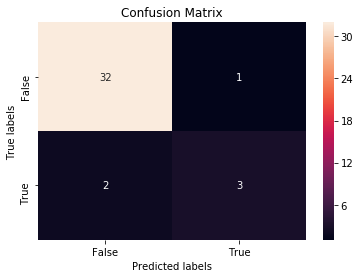

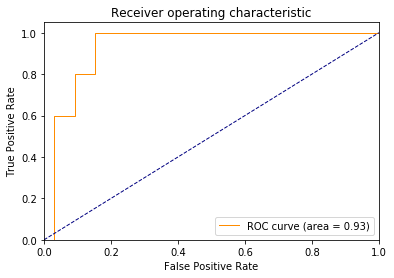

recall 0.6
macro_Precision=0.8455882352941176 micro_Precision=0.9210526315789473 weighted_Precision=0.9160216718266255
f1_score=0.667 auc=0.933 average_precision=0.598


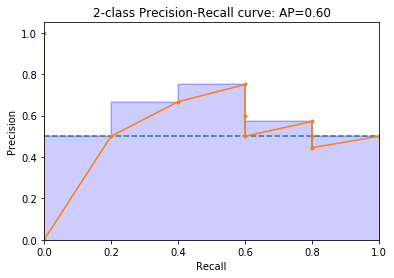

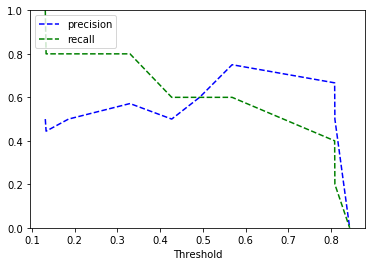

In [411]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.5, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)
best_xgb.fit(X_train_text,y_train)
xgb_best_model = perf_metrics(best_xgb,X_test_text,y_test)
xgb_best_model.show_metrics()

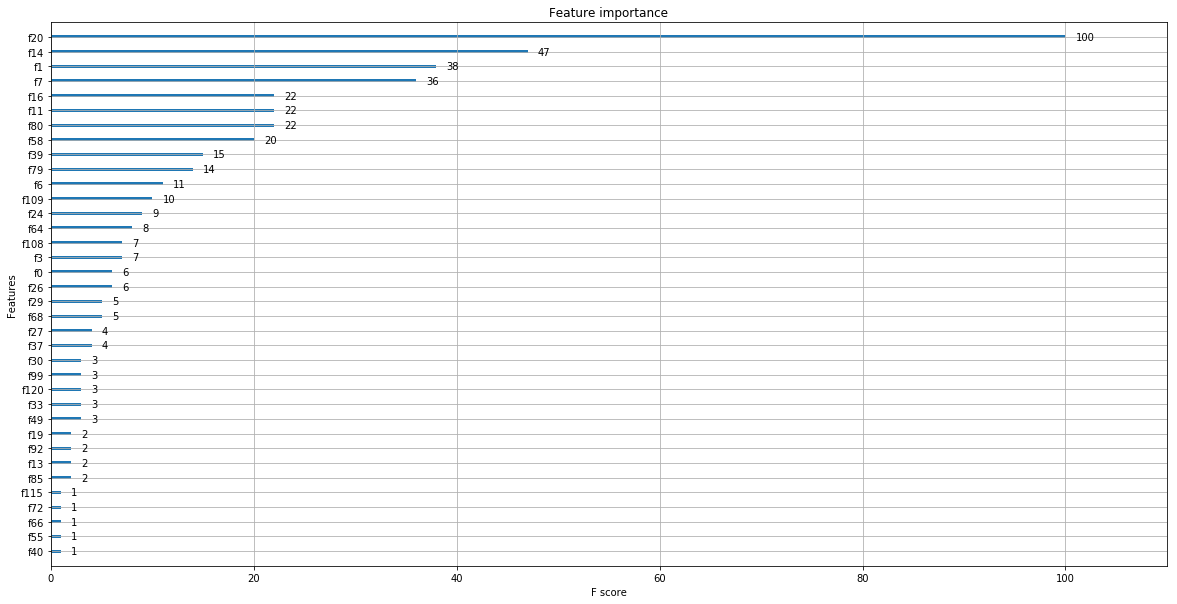

In [412]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
plot_importance(best_xgb, ax=ax)

(88, 125)

In [418]:
# A parameter grid for XGBoost
'''params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }'''
parameters = {'objective':['binary:logistic'],
              'gamma': [0.1, 0.5, 1],
              'learning_rate': [0.05,0.02,0.1], #so called `eta` value
              'max_depth': [2, 3, 4],
              'min_child_weight': [1, 5],
              'silent': [1],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.8, 1.0],
              'n_estimators': [25,50,100] #number of trees, change it to 1000 for better results
              }

xgb_model = XGBClassifier(nthread=-1)
clf_xgb_tuned = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='recall',
                   verbose=2, refit=True)
# Here we go
start_time = time.time() # timing starts from this point for "start_time" variable
clf_xgb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 220 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 1430 tasks      | elapsed:   10.1s
[Parallel(n_jobs=5)]: Done 3460 tasks      | elapsed:   22.9s
[Parallel(n_jobs=5)]: Done 4860 out of 4860 | elapsed:   33.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'objective': ['binary:logistic'], 'gamma': [0.1, 0.5, 1], 'learning_rate': [0.05, 0.02, 0.1], 'max_depth': [2, 3, 4], 'min_child_weight': [1, 5], 'silent': [1], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'n_estimators': [25, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)

In [419]:
clf_xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=1.0)

In [420]:
clf_xgb_tuned.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 1.0}

In [421]:
clf_xgb_tuned.best_score_

0.5700757575757576

              precision    recall  f1-score   support

       False       0.94      0.97      0.96        33
        True       0.75      0.60      0.67         5

   micro avg       0.92      0.92      0.92        38
   macro avg       0.85      0.78      0.81        38
weighted avg       0.92      0.92      0.92        38

accuracy 0.9210526315789473


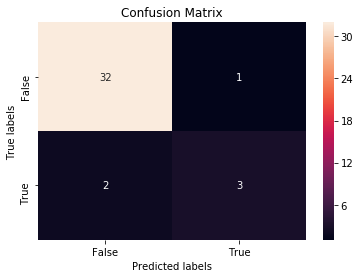

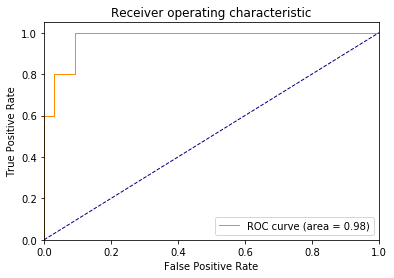

recall 0.6
macro_Precision=0.8455882352941176 micro_Precision=0.9210526315789473 weighted_Precision=0.9160216718266255
f1_score=0.667 auc=0.976 average_precision=0.885


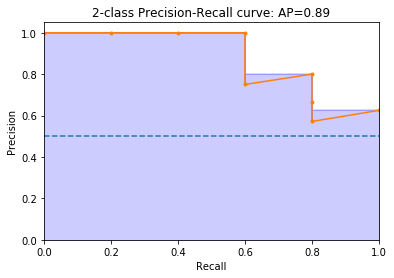

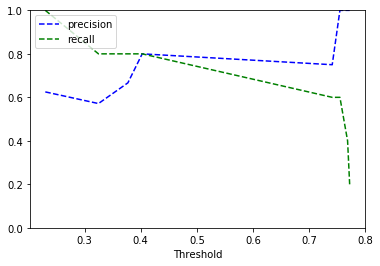

In [422]:
xgb_text_tuned = perf_metrics(clf_xgb_tuned,X_test,y_test)
xgb_text_tuned.show_metrics()

              precision    recall  f1-score   support

       False       0.94      0.97      0.96        33
        True       0.75      0.60      0.67         5

   micro avg       0.92      0.92      0.92        38
   macro avg       0.85      0.78      0.81        38
weighted avg       0.92      0.92      0.92        38

accuracy 0.9210526315789473


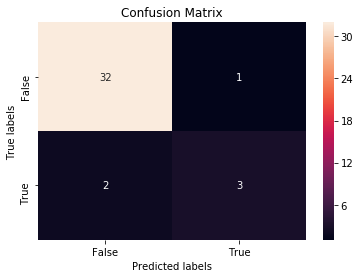

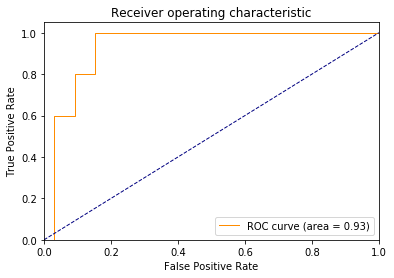

recall 0.6
macro_Precision=0.8455882352941176 micro_Precision=0.9210526315789473 weighted_Precision=0.9160216718266255
f1_score=0.667 auc=0.933 average_precision=0.598


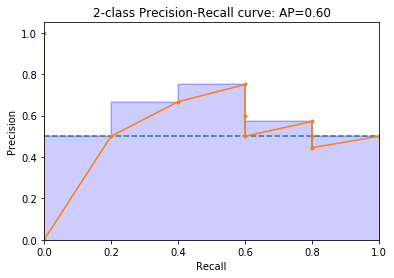

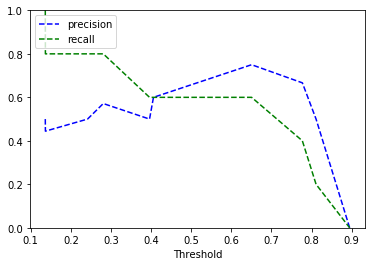

In [387]:
xgb_text_tuned.show_metrics()

In [ ]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.5, learning_rate=0.02,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1.0)
best_xgb.fit(X_train,y_train)